# Stage one

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))



GPU Available:  []


In [ ]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12243675387879951473
xla_global_id: -1
]


In [ ]:

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)




### Data clean and preprocess

In [ ]:
import pandas as pd
csv_path='/content/drive/MyDrive/food/Food Ingredients.csv'

In [ ]:
base_ingredients_path='/content/drive/MyDrive/baseIngredients.txt'
#Base Ingredients
f = open(base_ingredients_path, "r")
base_ing = f.read().split('\n')
f.close()


In [ ]:
# base_ingredients_path='/content/drive/MyDrive/ingredients_Recipes5k.txt'

In [ ]:
# f=open(base_ingredients_path,'r')
# f.read()

In [ ]:
#Base Ingredients
# f = open(base_ingredients_path, "r")
# base_ings = f.read().split('\n')
# f.close()


In [ ]:
# string=['yellow onion,flour,baking powder,seasoning salt,large eggs,milk,gluten free panko breadcrumbs,coconut oil,salt',
#  'white onion,panko,cornmeal,ground paprika,onion powder,garlic powder,cayenne,salt,all-purpose flour,eggs,vegetable oil']

In [ ]:
# result=''
# for item in string:
#   result+=item
# result


In [ ]:
# base_ings[0]+base_ings[1]""

In [ ]:
# base_ing=''
# for item in base_ings:

#   base_ing+=item
# base_ing

In [ ]:
# base_ing=base_ing.split(',')

In [ ]:
base_ing

["acidulated water,ackee,acorn squash,aduki beans,advocaat,agar-agar,ale,alfalfa sprouts,allspice,almond,almond essence,almond extract,amaranth,amaretti,anchovies,anchovy essence,angelica,angostura bitters,anise,apple,apple chutney,apple juice,apple sauce,apricot,apricot jam,arborio rice,arbroath smokie,argan oil,arrowroot,artichoke,asafoetida,asparagus,aubergine,avocado,bacon,bagel,baguette,baked beans,baking,baking powder,balsamic vinegar,bamboo shoots,banana,banana bread,barbary duck,barbecue sauce,barley,basil,basmati rice,bay boletes,bay leaf,beans,beansprouts,bechamel sauce,beef,beef consomme,beef dripping,beef mince,beef ribs,beef rump,beef sausage,beef stock,beef tomato,beer,beetroot,berry,betel leaves,beurre manie,bicarbonate of soda,bilberries,bird's-eye chillies,biscotti,biscuits,blachan,black beans,black bream,black eyed beans,black pepper,black pudding,black sesame seeds,black treacle,blackbean sauce,blackberry,blackcurrant,blackcurrant juice drink,blini,blood orange,blueb

In [ ]:
#Construct dataframe for dictionary
base_ing = base_ing[0].split(",")

In [ ]:
base_ing

['acidulated water',
 'ackee',
 'acorn squash',
 'aduki beans',
 'advocaat',
 'agar-agar',
 'ale',
 'alfalfa sprouts',
 'allspice',
 'almond',
 'almond essence',
 'almond extract',
 'amaranth',
 'amaretti',
 'anchovies',
 'anchovy essence',
 'angelica',
 'angostura bitters',
 'anise',
 'apple',
 'apple chutney',
 'apple juice',
 'apple sauce',
 'apricot',
 'apricot jam',
 'arborio rice',
 'arbroath smokie',
 'argan oil',
 'arrowroot',
 'artichoke',
 'asafoetida',
 'asparagus',
 'aubergine',
 'avocado',
 'bacon',
 'bagel',
 'baguette',
 'baked beans',
 'baking',
 'baking powder',
 'balsamic vinegar',
 'bamboo shoots',
 'banana',
 'banana bread',
 'barbary duck',
 'barbecue sauce',
 'barley',
 'basil',
 'basmati rice',
 'bay boletes',
 'bay leaf',
 'beans',
 'beansprouts',
 'bechamel sauce',
 'beef',
 'beef consomme',
 'beef dripping',
 'beef mince',
 'beef ribs',
 'beef rump',
 'beef sausage',
 'beef stock',
 'beef tomato',
 'beer',
 'beetroot',
 'berry',
 'betel leaves',
 'beurre manie

In [ ]:

df=pd.read_csv(csv_path)

In [ ]:
df.head()

,Unnamed: 0,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [ ]:
df.Image_Name

0        miso-butter-roast-chicken-acorn-squash-panzanella
1               crispy-salt-and-pepper-potatoes-dan-kluger
2               thanksgiving-mac-and-cheese-erick-williams
3                italian-sausage-and-bread-stuffing-240559
4                       newtons-law-apple-bourbon-cocktail
                               ...                        
13496                           brownie-pudding-cake-14408
13497    israeli-couscous-with-roasted-butternut-squash...
13498    rice-with-soy-glazed-bonito-flakes-and-sesame-...
13499                                   spanakopita-107344
13500    mexican-poblano-spinach-and-black-bean-lasagne...
Name: Image_Name, Length: 13501, dtype: object

In [ ]:
cleaned_ingredients=df['Cleaned_Ingredients'].tolist()

In [ ]:
len(cleaned_ingredients)

13501

In [ ]:
df.shape

(13501, 6)

In [ ]:
! pip install unidecode

In [ ]:
# import re
# from collections import Counter

# from unidecode import unidecode
# import pandas as pd

# #first/last N words to use for combining ingredients
# NUM_WORDS = 2
# #quantile cutoff for ingredient frequency (discard uncommon ingredients)
# # alter this to play with ingredient_words
# VALID_QUANTILE = 0.97

# def process_ingredient(ingredient_words):
#     # print('before')
#     # print(ingredient_words)
#     #remove words that are entirely numbers
#     ingredient_words = [word for word in ingredient_words if not word.isnumeric()]
#     #remove partial stop fragments
#     stop_fragments = ["spoon", "tsp", "tbsp", "inch", "finely", "ounce", "ingredient", "pound"]
#     ingredient_words = [word for word in ingredient_words if not any(stop in word for stop in stop_fragments)]
#     #remove full stop words
#     stop_words = [
#         "lb", "g", "oz", "lbs", "cups", "ml", "cup",
#         "pieces", "a", "room", "at", "in", "equipment", "all",
#         "for", "to", "into", "of", "if", "more", "and", "plus",
#         "lengthwise", "crosswise", "about", "as", "or", "temperature",
#         "simple", "cut", "small", "medium", "large", "fresh", "freshly",
#         "divided", "on", "very", "coarsely", "thinly", '-4-lb', '454g',
#         '1--2', 'total', 'good-quality', '7g', '225ml', '125g', '75g', '375g',
#         '25g', 'you', 'will', 'also', 'need', '12-hole', 'tin', 'each',
#         'measuring', '6cmx2cm', 'it', 'is', 'the', 'then', '4-qt', 'shallow',
#         'ceramic', 'glass', 'optional', 'info', '5-8', '5-6-oz', '-', '3-4',
#         '4-8', 'only', '4-5', '6-mm', 'knife', 'back', '-15', 'package',
#         'instructions', '8-1', 'taste', 'serve', 'serving', 'one', '-thick',
#         '-3', '-4', '4-oz', '2l', '2-', 'flat-leaf', '9-to-1', '-oz', '4-1',
#         '4-lb', '1kg', '1-1', '14-oz', '8-12', '1-2', '-12-oz', '175g', '15g',
#         '1-lb', '15-oz', '215g', '12g', '113g', '14-', '16-oz', '17-', '3-',
#         '-ml', '-12-lb', 'two-piece', '24-hole', '6-cup', 'x', 'my', 'favorite',
#         'recipe', '5-oz', 'x3', 'cm', 'electric', 'handheld', 'whisk', 'see',
#         'cooks\'', 'note', 'below', 'qt', 'such', "murray's", 'trader',
#         "joe's", 'jarred', "rao's", '3-cup', '4-to', 'grams', 'quart', 'l',
#         '-25', 'store-bought', 'fl', '6-', '13-15', '335g', '2-3', '72g', '57g',
#         '36g', '194g', '195g', '475g', '77g', '265g', '5g', '3g', '2g', '-1',
#         '2-quart', 'cast-iron', 'skillet', '5degf', '115degf', 'thermometer',
#         'maker', 'other', 'incubator', 'thermos', 'cheesecloth', 'straining',
#         'mason', 'jars', 'container', 'storage', 'starters', 'can', 'be',
#         'found', 'some', 'grocery', 'stores', 'online', 'sources', 'supply',
#         'company', 'read', 'determine', 'how', 'much', 'envelopes', 'packets',
#         'perfectly', 'sized', 'etc', 'using', 'choose', 'that', "it's",
#         'important', 'select', 'an', 'version', 'that', 'contains', 'but',
#         'fat', 'content', "doesn't", 'matter'
#         # homemade, preferably, dutch-processed by
#         # with jar container microwave pint do this removed your
#         # half such from two three bottles cans x other use made
#         # from not available some
#     ]
#     ingredient_words = [word for word in ingredient_words if not any(stop == word for stop in stop_words)]
#     # print('after')
#     # print(ingredient_words)
#     return ingredient_words

# def preprocess_ingredients_list(ingredients):
#     #remove non-ascii characters and convert each ingredient to lower case
#     ingredients = [unidecode(e).lower() for e in ingredients]
#     #replace unwanted characters with spaces (TODO: allow more characters?)
#     ingredients = [re.sub(r"[^a-z1-9\-' ]", " ", e).strip() for e in ingredients]
#     #split each ingredient into words
#     ingredients_as_words = [e.split() for e in ingredients]
#     #process each ingredient by removing stop words, etc
#     processed_ingredients = [process_ingredient(e) for e in ingredients_as_words]
#     #TODO: remove empty ingredients (no words remaining after removing stop words, etc)
#     #  will this even be an issue?

#     #pull out first/last N words
#     ingredients_first_n_words = [" ".join(e[:NUM_WORDS]) for e in processed_ingredients]
#     ingredients_last_n_words = [" ".join(e[-NUM_WORDS:]) for e in processed_ingredients]
#     #replace original ingredients with the unique set of ingredients from the first/last N words
#     processed_ingredients = list(set(ingredients_first_n_words + ingredients_last_n_words))
#     return processed_ingredients

# def print_valid_ingredient_counts(ingredients, counts):
#     for ingredient, count in zip(ingredients, counts):
#         print(ingredient, count)
#     print(f'-----------------------------------------')
#     print(f'num valid ingredients: {len(ingredients)}')

# def determine_ingredients_set(ingredients):
#     #choose a subset of the ingredients based on their frequency
#     ingredients_flat = [e for l in ingredients for e in l]
#     counter = Counter(ingredients_flat)
#     #determine cutoff quantile value
#     quantile = pd.Series(counter.values()).quantile(VALID_QUANTILE)
#     #remove ingredients whose count is lower than the quantile value
#     valid_ingredients = {ingredient: count for ingredient, count in counter.items() if count >= quantile}
#     #sort by count descending
#     valid_ingredients = sorted(valid_ingredients.items(), key=lambda x: x[1], reverse=True)
#     #unzip to [ingredients, counts]
#     return [*zip(*valid_ingredients), quantile]

# def preprocess_ingredients(dataset_ingredients):
#     #combine ingredients using the first/last N words method
#     ingredients = dataset_ingredients.apply(preprocess_ingredients_list)

#     valid_ingredients_list, valid_ingredients_counts, quantile = determine_ingredients_set(ingredients)

#     # print_valid_ingredient_counts(valid_ingredients_list, valid_ingredients_counts)
#     # print(f"quantile: {quantile}")

#     #remove ingredients that are not part of the subset
#     def remove_invalid_ingredients(ingredients):
#         return [e for e in ingredients if e in valid_ingredients_list]

#     ingredients = ingredients.apply(remove_invalid_ingredients)

#     #convert ingredients to indexes
#     def indexify(ingredients):
#         #sort them too, this doesn't matter as long as we consider ingredients as a set
#         #just to make inspection a bit cleaner
#         return sorted([valid_ingredients_list.index(e) for e in ingredients])

#     ingredients = ingredients.apply(indexify)

#     return ingredients, valid_ingredients_list

# def decode_ingredients(ingredient_indexes, valid_ingredients):
#     return [valid_ingredients[i] for i in ingredient_indexes]

In [ ]:
# import re
# from unidecode import unidecode
# import pandas as pd



# # Function to convert string representations to lists
# def convert_to_list(string_list):
#     return eval(string_list)


# # Convert string representations to actual lists
# ingredient_lists = [convert_to_list(string_list) for string_list in cleaned_ingredients]

# # Apply the preprocess_ingredients function
# processed_ingredients, valid_ingredients_list = preprocess_ingredients(pd.Series(ingredient_lists))

# # Print the processed ingredients and valid ingredient list
# print(processed_ingredients)
# print(valid_ingredients_list)


In [ ]:
# extracted_ingredients=[]
# for idx, recipe_indexes in enumerate(processed_ingredients):
#     decoded_ingredients = decode_ingredients(recipe_indexes, valid_ingredients_list)
#     # print(f"Recipe {idx + 1}: {decoded_ingredients}")

#     extracted_ingredients.append(decoded_ingredients)


In [ ]:
# extracted_ingredients[0]

In [ ]:
# extract the ingredients out will take a long time

In [ ]:
# Ingredients vocabulary
# ingredients_vocabulary = [
#     'salt', 'black pepper', 'sugar', 'flour', 'butter', 'milk', 'water', 'egg whites', 'oil',
#     'onion', 'garlic powder', 'chicken', 'beef', 'pork', 'bacon', 'cheese', 'tomato', 'potato',
# ]
ingredients_vocabulary=base_ing
# recipes = [
#     "['2 large egg whites', '1 pound new potatoes (about 1 inch in diameter)', '2 teaspoons kosher salt']",
#     "['1 cup evaporated milk', '1 cup whole milk', '1 tsp. garlic powder']"
# ]
recipes=cleaned_ingredients

extracted_ingredients = []

for recipe in recipes:
    ingredients = []
    for ingredient in recipe.split("', '"):
        # print(ingredient)
        for vocab_ingredient in ingredients_vocabulary:
            # print(vocab_ingredient)
            if vocab_ingredient in ingredient:
                ingredients.append(vocab_ingredient)
    extracted_ingredients.append(ingredients)

print(extracted_ingredients)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Use ingredients_Recipes5k.txt
# extracted_ingredients[0]


In [ ]:

df.Cleaned_Ingredients[0]

'[\'1 (3½–4-lb.) whole chicken\', \'2¾ tsp. kosher salt, divided, plus more\', \'2 small acorn squash (about 3 lb. total)\', \'2 Tbsp. finely chopped sage\', \'1 Tbsp. finely chopped rosemary\', \'6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature\', \'¼ tsp. ground allspice\', \'Pinch of crushed red pepper flakes\', \'Freshly ground black pepper\', \'⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)\', \'2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces\', \'2 Tbsp. extra-virgin olive oil\', \'½ small red onion, thinly sliced\', \'3 Tbsp. apple cider vinegar\', \'1 Tbsp. white miso\', \'¼ cup all-purpose flour\', \'2 Tbsp. unsalted butter, room temperature\', \'¼ cup dry white wine\', \'2 cups unsalted chicken broth\', \'2 tsp. white miso\', \'Kosher salt\', \'freshly ground pepper\']'

In [ ]:
# Use baseIngredients.txt
# extracted_ingredients[0]

In [ ]:

# # Create a list to store unique ingredients for each recipe
# new_ingredient_lists = []

# for ingredients in extracted_ingredients:
#     unique_ingredients = list(set(ingredients))
#     new_ingredient_lists.append(unique_ingredients)

# # contains the ingredient lists without repeated ingredients
# print(new_ingredient_lists)


In [ ]:
new_ingredient_lists=extracted_ingredients

In [ ]:
len(new_ingredient_lists)

13501

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

sf = pd.DataFrame(mlb.fit_transform(new_ingredient_lists),columns=mlb.classes_) #binary encode ingredients

In [ ]:
sf

,ackee,acorn squash,agar-agar,ale,alfalfa sprouts,allspice,almond,almond extract,amaranth,amaretti,...,wild mushrooms,wild rice,wine,worcestershire sauce,wraps,yam,yeast,yellow lentil,yoghurt,zest
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sf.columns[0:100]

Index(['ackee', 'acorn squash', 'agar-agar', 'ale', 'alfalfa sprouts',
       'allspice', 'almond', 'almond extract', 'amaranth', 'amaretti',
       'anchovies', 'angelica', 'angostura bitters', 'anise', 'apple',
       'apple chutney', 'apple juice', 'apricot', 'apricot jam',
       'arborio rice', 'arrowroot', 'artichoke', 'asafoetida', 'asparagus',
       'avocado', 'bacon', 'bagel', 'baguette', 'baking', 'baking powder',
       'balsamic vinegar', 'bamboo shoots', 'banana', 'barbecue sauce',
       'barley', 'basil', 'basmati rice', 'bay leaf', 'beans', 'beef',
       'beef ribs', 'beef rump', 'beef sausage', 'beef stock', 'beer',
       'beetroot', 'berry', 'betel leaves', 'bicarbonate of soda', 'biscotti',
       'biscuits', 'black beans', 'black pepper', 'black sesame seeds',
       'blackberry', 'blackcurrant', 'blini', 'blood orange', 'blueberry',
       'boar', 'bonito', 'borage', 'borlotti beans', 'bouquet garni', 'bran',
       'brandy', 'bratwurst', 'brazil nut', 'bread', 

In [ ]:
image_height, image_width = 224, 224
image_names=df['Image_Name'].tolist()

In [ ]:
# image_names

In [ ]:
##############new try

In [ ]:
# Load and preprocess image data using ImageDataGenerator
image_dir = '/content/drive/MyDrive/food/Food Images/Food Images/'
csv_path


'/content/drive/MyDrive/food/Food Ingredients.csv'

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam




In [ ]:
# Load and preprocess  image
def load_and_preprocess_image(image_path, image_height, image_width):

    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [image_height, image_width])
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img / 255.0  # Normalize pixel values

    # mean = np.mean(img, axis=(0,1,2))
    # std = np.std(img, axis=(0,1,2))
    # img = (img - mean) / std

    return img



In [ ]:
image_dir

'/content/drive/MyDrive/food/Food Images/Food Images/'

In [ ]:

df.Image_Name

0        miso-butter-roast-chicken-acorn-squash-panzanella
1               crispy-salt-and-pepper-potatoes-dan-kluger
2               thanksgiving-mac-and-cheese-erick-williams
3                italian-sausage-and-bread-stuffing-240559
4                       newtons-law-apple-bourbon-cocktail
                               ...                        
13496                           brownie-pudding-cake-14408
13497    israeli-couscous-with-roasted-butternut-squash...
13498    rice-with-soy-glazed-bonito-flakes-and-sesame-...
13499                                   spanakopita-107344
13500    mexican-poblano-spinach-and-black-bean-lasagne...
Name: Image_Name, Length: 13501, dtype: object

In [ ]:
df['Image_Name'][0]

'miso-butter-roast-chicken-acorn-squash-panzanella'

In [ ]:
# images=[]
# for i in range(len(df['Image_Name'])):
#   # print(df['Image_Name'][i])
#     img_path = image_dir + df['Image_Name'][i] + '.jpg'
#     img = load_and_preprocess_image(img_path, image_height, image_width)
#     images.append(img)


In [ ]:
import ast
import numpy as np

def custom_data_generator(image_paths, binary_labels, image_dir, image_height, image_width, batch_size):
    num_samples = len(image_paths)
    start = 0

    while True:
        end = start + batch_size
        if end >= num_samples:
            end = num_samples
            start = 0  # Restart from the beginning

        batch_image_paths = image_paths[start:end]
        batch_binary_labels = binary_labels[start:end]
        images = []

        for img_name in batch_image_paths:
            img_path = image_dir + img_name + '.jpg'
            img = load_and_preprocess_image(img_path, image_height, image_width)
            images.append(img)

        start = end

        yield np.array(images), batch_binary_labels

# Create the data generator
datagen = custom_data_generator(image_names, sf, image_dir, image_height, image_width, batch_size=32)




In [ ]:
# To get a batch of data (images and labels):
images, labels = next(datagen)

## CNN model

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load images
X_train_images = images

# Load encoded labels (32 images, 817 ingredients)
y_train_labels = labels


from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_images, y_train_labels, test_size=0.2, random_state=42)


from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Define a custom metric function for F1 score


def f1_score_metric(y_true, y_pred):
    y_pred_binary = K.round(y_pred)

    # Cast to the appropriate data type
    y_true = K.cast(y_true, 'float32')
    y_pred_binary = K.cast(y_pred_binary, 'float32')

    # Calculate F1 score using TensorFlow operations
    true_positives = K.sum(K.round(K.clip(y_true * y_pred_binary, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred_binary, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1


Epoch 1/200
1/1 [==============================] - 5s 5s/step - loss: 1.5094 - accuracy: 0.0000e+00 - val_loss: 1.1956 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 116ms/step - loss: 2.6635 - accuracy: 0.0400 - val_loss: 1.2230 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 110ms/step - loss: 2.2146 - accuracy: 0.0000e+00 - val_loss: 1.2481 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 101ms/step - loss: 1.5777 - accuracy: 0.0000e+00 - val_loss: 1.2733 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 101ms/step - loss: 1.3074 - accuracy: 0.0000e+00 - val_loss: 1.2937 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 92ms/step - loss: 1.3728 - accuracy: 0.0000e+00 - val_loss: 1.3076 - val_accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 96ms/step - loss: 1.3954 - accuracy: 0.0000e+00 - val_loss: 

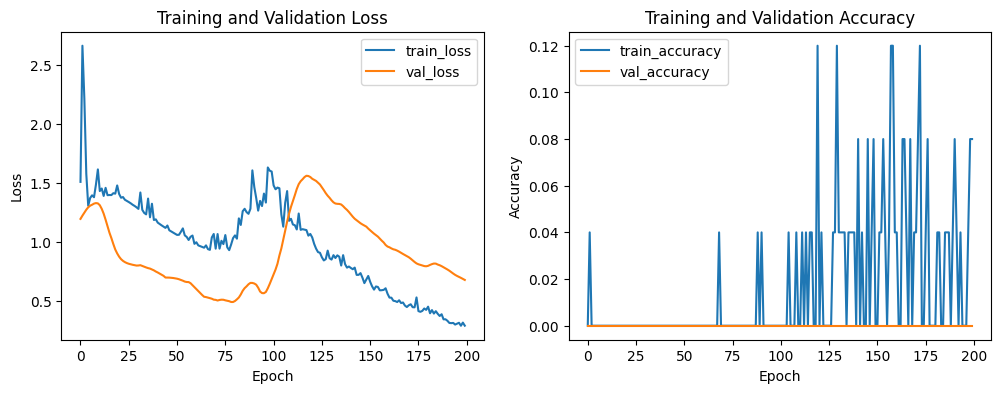

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# # Define early stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)



# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
)

datagen.fit(X_train)



from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.7))  # Added dropout for regularization
model.add(Dense(y_train_labels.shape[1], activation='sigmoid'))



# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Training the model
# history = model.fit(X_train_images, y_train_labels, epochs=150)

# Training the model with validation data
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))

import matplotlib.pyplot as plt

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# plt.tight_layout()
# plt.show()



In [ ]:
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
import tensorflow.keras.backend as K
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

# Define a custom metric function for F1 score


def f1_score_metric(y_true, y_pred):
    y_pred_binary = K.round(y_pred)

    # Cast to the appropriate data type
    y_true = K.cast(y_true, 'float32')
    y_pred_binary = K.cast(y_pred_binary, 'float32')

    # Calculate F1 score using TensorFlow operations
    true_positives = K.sum(K.round(K.clip(y_true * y_pred_binary, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred_binary, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())

    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Data Preprocessing
# X_train_images = X_train_images / 255.0
# mean = np.mean(X_train_images, axis=(0, 1, 2))
# std = np.std(X_train_images, axis=(0, 1, 2))
# X_train_images = (X_train_images - mean) / std

# Compile the model with additional metrics

def lr_scheduler(epoch, lr):
    return lr * 0.98  # Adjust the multiplier


from tensorflow.keras.optimizers import RMSprop
lr_callback = LearningRateScheduler(lr_scheduler)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score_metric])


# Define early stopping
early_stopping = EarlyStopping(monitor='val_f1_score_metric', patience=30, restore_best_weights=True)

# Training the model with validation data
# history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping,lr_callback])
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_val, y_val),epochs=200)
# history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))





Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.1876 - accuracy: 0.0000e+00 - precision_33: 0.6364 - recall_33: 0.2745 - f1_score_metric: 0.3836 - val_loss: 0.6327 - val_accuracy: 0.0000e+00 - val_precision_33: 0.3770 - val_recall_33: 0.1769 - val_f1_score_metric: 0.2408
Epoch 2/200
1/1 [==============================] - 0s 336ms/step - loss: 0.1788 - accuracy: 0.0400 - precision_33: 0.6197 - recall_33: 0.3554 - f1_score_metric: 0.4517 - val_loss: 0.6145 - val_accuracy: 0.0000e+00 - val_precision_33: 0.3676 - val_recall_33: 0.1923 - val_f1_score_metric: 0.2525
Epoch 3/200
1/1 [==============================] - 0s 333ms/step - loss: 0.1833 - accuracy: 0.0400 - precision_33: 0.5816 - recall_33: 0.3407 - f1_score_metric: 0.4297 - val_loss: 0.5978 - val_accuracy: 0.0000e+00 - val_precision_33: 0.3289 - val_recall_33: 0.1923 - val_f1_score_metric: 0.2427
Epoch 4/200
1/1 [==============================] - 0s 335ms/step - loss: 0.1874 - accuracy: 0.0800 - precision_33:

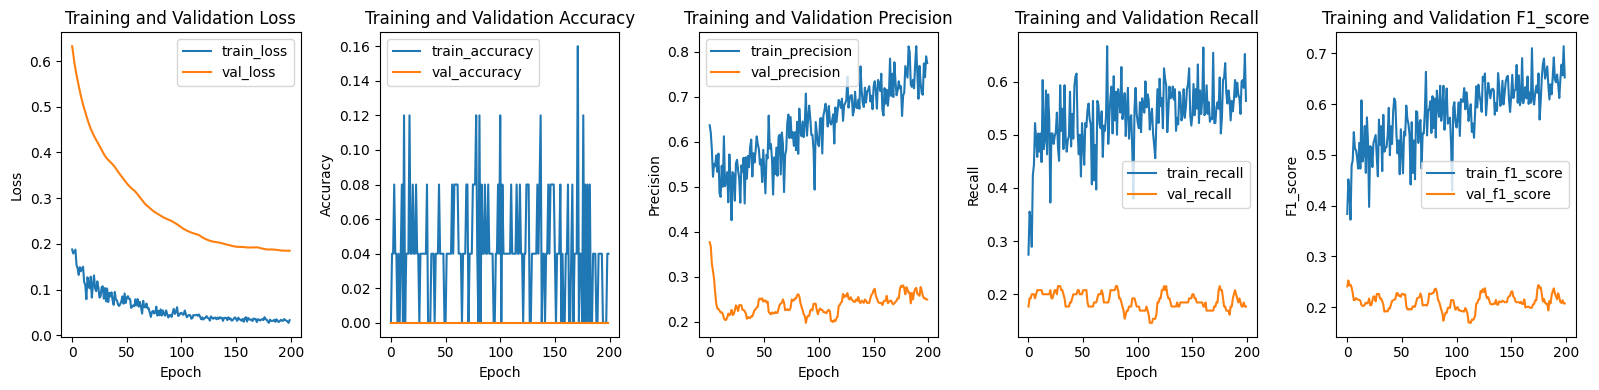

In [ ]:
# Plot training history (loss and accuracy)
plt.figure(figsize=(16, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 5, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation precision
plt.subplot(1, 5, 3)
plt.plot(history.history['precision_33'], label='train_precision')
plt.plot(history.history['val_precision_33'], label='val_precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot training and validation recall
plt.subplot(1, 5, 4)
plt.plot(history.history['recall_33'], label='train_recall')
plt.plot(history.history['val_recall_33'], label='val_recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Plot training and validation F1 score
plt.subplot(1, 5, 5)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'precision_33', 'recall_33', 'f1_score_metric', 'val_loss', 'val_accuracy', 'val_precision_33', 'val_recall_33', 'val_f1_score_metric'])


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.6935 - accuracy: 0.0000e+00 - precision_34: 0.0174 - recall_34: 0.4338 - f1_score_metric: 0.0334 - val_loss: 0.7994 - val_accuracy: 0.0000e+00 - val_precision_34: 0.0280 - val_recall_34: 0.4615 - val_f1_score_metric: 0.0529
Epoch 2/100
1/1 [==============================] - 0s 110ms/step - loss: 0.7949 - accuracy: 0.0000e+00 - precision_34: 0.0218 - recall_34: 0.4093 - f1_score_metric: 0.0415 - val_loss: 0.6394 - val_accuracy: 0.0000e+00 - val_precision_34: 0.0269 - val_recall_34: 0.4154 - val_f1_score_metric: 0.0505
Epoch 3/100
1/1 [==============================] - 0s 106ms/step - loss: 0.6395 - accuracy: 0.0000e+00 - precision_34: 0.0210 - recall_34: 0.3701 - f1_score_metric: 0.0397 - val_loss: 0.6071 - val_accuracy: 0.0000e+00 - val_precision_34: 0.0281 - val_recall_34: 0.4000 - val_f1_score_metric: 0.0525
Epoch 4/100
1/1 [==============================] - 0s 112ms/step - loss: 0.6081 - accuracy: 0.0000e+00 - p

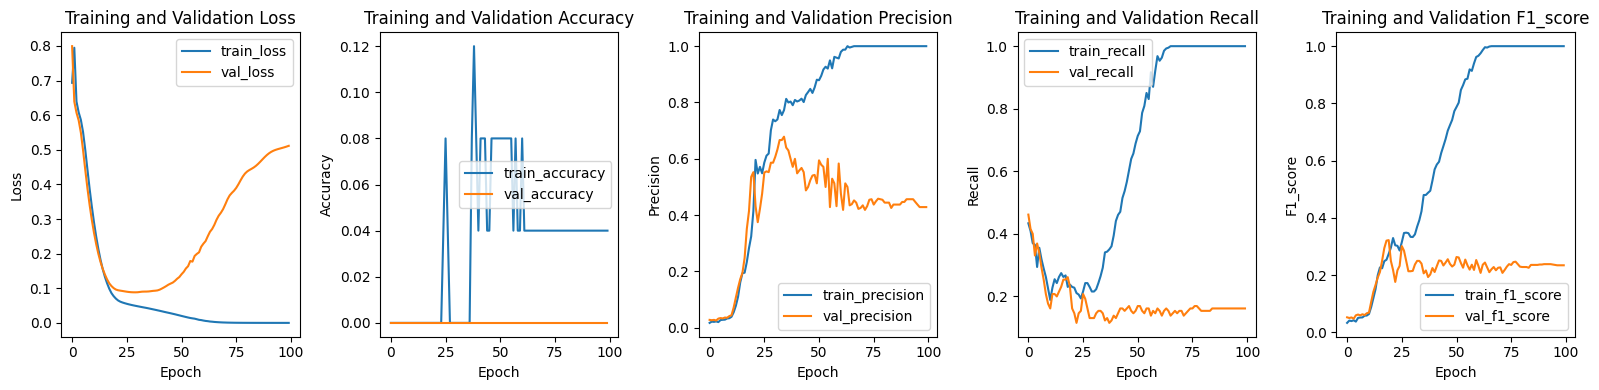

In [ ]:
# Define a CNN model, not using any regularazation
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train_labels.shape[1], activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score_metric])


# Define early stopping
early_stopping = EarlyStopping(monitor='val_f1_score_metric', patience=30, restore_best_weights=True)

# Training the model with validation data
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))


# Plot training history (loss and accuracy)
plt.figure(figsize=(16, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 5, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation precision
plt.subplot(1, 5, 3)
plt.plot(history.history['precision_34'], label='train_precision')
plt.plot(history.history['val_precision_34'], label='val_precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot training and validation recall
plt.subplot(1, 5, 4)
plt.plot(history.history['recall_34'], label='train_recall')
plt.plot(history.history['val_recall_34'], label='val_recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Plot training and validation F1 score
plt.subplot(1, 5, 5)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
images.shape

(32, 224, 224, 3)

In [ ]:
len(labels)

32

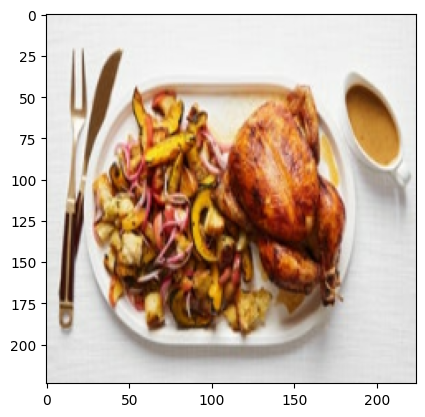

In [ ]:
import matplotlib.pyplot as plt

# plot the first image from the batch
image_to_plot = images[0]


plt.imshow(image_to_plot, cmap='viridis')
plt.show()



In [ ]:
labels

,ackee,acorn squash,agar-agar,ale,alfalfa sprouts,allspice,almond,almond extract,amaranth,amaretti,...,wild mushrooms,wild rice,wine,worcestershire sauce,wraps,yam,yeast,yellow lentil,yoghurt,zest
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# # Load images
# X_train_images = images

# # Load encoded labels (32 images, 817 ingredients)
# y_train_labels = labels

# # Define a simple CNN model
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(y_train_labels.shape[1], activation='sigmoid'))  # Output layer matches the number of ingredients

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_images, y_train_labels, epochs=300, batch_size=32)


In [ ]:
image_test='/content/drive/MyDrive/meat.jpg/'

In [ ]:
import numpy as np

# Load and preprocess the image want to predict
new_image_path = image_test

new_image = load_and_preprocess_image(new_image_path, image_height, image_width)

#  create a batch of size 1 for prediction
input_data = np.array([new_image])

# Make predictions
predictions = model.predict(input_data)

# 'predictions' will contain the model's output for the new image


1/1 [==============================] - 0s 211ms/step


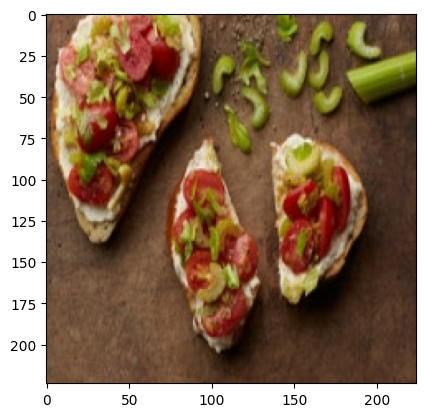

In [ ]:
plt.imshow(new_image, cmap='viridis')
plt.show()

In [ ]:
predictions

array([[1.65100298e-26, 4.62475414e-12, 9.06386452e-16, 1.77750289e-02,
        2.92817311e-23, 1.16205507e-08, 2.53363737e-07, 2.34772253e-25,
        1.06336960e-16, 7.37765539e-21, 1.35901345e-07, 7.24627196e-24,
        1.08273796e-18, 2.65470234e-17, 6.34219637e-03, 4.65003949e-17,
        7.41369906e-04, 8.82571207e-23, 8.14310505e-23, 6.89248811e-21,
        1.59322948e-15, 1.28754107e-09, 6.88345585e-19, 6.01648991e-19,
        9.79033357e-05, 1.12696250e-11, 4.26614370e-15, 5.40635418e-25,
        4.22366497e-07, 6.02677945e-27, 7.42943021e-19, 8.61690038e-21,
        2.03075276e-26, 7.71310249e-20, 1.06646950e-23, 4.74363312e-25,
        1.15661550e-19, 1.80204931e-11, 6.02473505e-02, 5.98221505e-24,
        8.37891067e-21, 9.66053058e-20, 1.74013817e-19, 9.14352049e-18,
        2.67805656e-24, 2.88154074e-18, 1.52753363e-19, 3.09025884e-28,
        1.28267004e-14, 8.58162100e-17, 2.64849384e-23, 2.98117442e-08,
        1.35749578e-02, 9.57143611e-19, 1.86035025e-13, 6.618679

In [ ]:
labels.columns

Index(['ackee', 'acorn squash', 'agar-agar', 'ale', 'alfalfa sprouts',
       'allspice', 'almond', 'almond extract', 'amaranth', 'amaretti',
       ...
       'wild mushrooms', 'wild rice', 'wine', 'worcestershire sauce', 'wraps',
       'yam', 'yeast', 'yellow lentil', 'yoghurt', 'zest'],
      dtype='object', length=817)

In [ ]:
# Define the threshold value
threshold = 0.2  # Adjust this value based on the desired confidence level

# Create an empty list to store the true ingredients
true_ingredients = []

# Iterate through the list of ingredients
for i in range(len(predictions[0])):
    # Check if the probability for this ingredient is above the threshold
    # print(predictions[0][i])
    if predictions[0][i] >= threshold:
        # print(predictions[0][i])
        true_ingredients.append(labels.columns[i])

# The true_ingredients list will now contain the ingredients that meet the threshold
print("True Ingredients:", true_ingredients)


True Ingredients: ['garlic', 'gin', 'oil', 'olive', 'olive oil', 'pepper', 'salt']


Model Summary:

My model is designed for multi-label image classification, where I predict a set of ingredients for a given food image. The model architecture is relatively simple, consisting of a few convolutional and dense layers:

Input Layer: The input layer expects images with dimensions (224, 224, 3), representing 224x224 pixel images with three color channels (RGB).

Convolutional Layers: Two convolutional layers with max-pooling are used for feature extraction. The first layer has 32 filters, and the second layer has 64 filters. These layers are responsible for learning image features.

Flatten Layer: I flatten the feature maps to feed them into the dense layers.

Dense Layers: I have two dense layers, one with 128 neurons and another with a number of neurons equal to the number of ingredients I am predicting (350 in my case). I use the sigmoid activation function in the final dense layer for multi-label classification.

Compilation: My model is compiled with the Adam optimizer and binary cross-entropy loss, suitable for multi-label classification tasks.

Possible Reasons for Lower Accuracy:

Model Complexity: My model is relatively simple. For a task involving thousands of ingredients, a more complex architecture might be necessary. Deeper networks, transfer learning from pre-trained models, and attention mechanisms can help capture intricate details in images.

Training Data: The quality and quantity of my training data can significantly impact accuracy. If the dataset is small or contains noisy or imbalanced labels, my model may struggle to generalize effectively. I should ensure that my data is clean and well-labeled.

Imbalanced Data: If some ingredients are significantly more common in the dataset than others, my model may be biased towards those ingredients. Techniques like class weighting can help address this issue.

Hyperparameter Tuning: I should experiment with different hyperparameters, such as learning rate, batch size, and the number of layers/neurons in the model. Fine-tuning these can have a substantial impact on accuracy.

Overfitting: I should check for signs of overfitting by monitoring the training and validation loss curves. I may need to apply regularization techniques like dropout or L2 regularization to prevent overfitting.

Data Augmentation: Data augmentation techniques can be used to artificially increase the size of my training dataset, which can help my model generalize better.

Label Encoding: I must ensure that my labels are correctly encoded using multi-label binarization to handle multi-label classification.

Training Duration: Training for more epochs may be required to achieve better accuracy. However, I should be cautious of overfitting.

Evaluation Metrics: I should consider using appropriate evaluation metrics for multi-label classification, such as F1-score, Hamming loss, or Jaccard score, in addition to accuracy.

Complexity of the Task: Predicting from a large set of ingredients is a challenging task. It might be worthwhile to first focus on predicting a subset of ingredients that occur more frequently and then expand to the entire set as my model's performance improves.

By addressing these factors, I can work to improve the accuracy of my model for the task at hand.

## ResNet50 model

In [ ]:
num_ingredients=len(labels)

In [ ]:
# I tried add augmentation, worse;
# I tried add BatchNormalization, worse;



# Add dropout and increase the value from 0.5 to 0.8, better

# Experiment with unfreezing different numbers of layers or unfreezing layers at different depths in the network, and fine tuning.
# My model keeps crashing when I want to make it more complex, for using all available RAM, even though I purchased Colab Pro.


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Limit GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import f1_score
import tensorflow.keras.backend as K
import numpy as np


# Set seed for NumPy
np.random.seed(42)

# Set seed for TensorFlow
tf.random.set_seed(42)

# Load pre-trained ResNet-50 model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Add a Global Average Pooling layer
model = Sequential()
model.add(base_model)


model.add(GlobalAveragePooling2D())
# Add Batch Normalization layers after convolutional layers
# model.add(BatchNormalization()) # The performance will be worse after this layer


# # Add Dropout layer for regularization
model.add(Dropout(0.8)) ## adjust between (0.5,0.6,0.7,0.8,0.9) best is 0.8


# # Add a Dense layer with ReLU activation
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dense(256, activation='relu'))
# # Add another Dropout layer
# model.add(Dropout(0.5))


# Add a custom classifier for ingredient prediction with 817 output units
model.add(Dense(817, activation='sigmoid'))


from tensorflow.keras.layers import BatchNormalization



# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




# Compile the model with additional metrics

# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall(), f1_score_metric])

# Augumentation has worse performance
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
#     fill_mode='nearest'
# )

# # Fit the data generator on your training data
# datagen.fit(X_train)



# Define early stopping
early_stopping = EarlyStopping(monitor='val_f1_score_metric', patience=30, restore_best_weights=True)

# Use the data generator in the fit function
# history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
#                     epochs=200,
#                     validation_data=(X_val, y_val),
#                     callbacks=[early_stopping])



from tensorflow.keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch, lr):
    return lr * 0.98  # Adjust the multiplier between(0.95, 0.98, no much difference)


# Unfreeze a different set of layers
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Keep the early layers frozen
# for layer in base_model.layers[:-50]:
#     layer.trainable = False


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_f1_score_metric', patience=30, restore_best_weights=True)



model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall(), f1_score_metric]) ## adjust learning rate between (0.1,0.001,0.0005,0001) best is 0.001

lr_callback = LearningRateScheduler(lr_scheduler)

# history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
#                     epochs=200,
#                     validation_data=(X_val, y_val),
#                     callbacks=[early_stopping, lr_callback])


# Training the model with validation data, with early_stopping
history = model.fit(X_train, y_train, batch_size=16, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping])


# Training the model with validation data, without early_stopping
# history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val))






Epoch 1/200
2/2 [==============================] - 45s 4s/step - loss: 0.8821 - accuracy: 0.0000e+00 - precision_1: 0.0229 - recall_1: 0.5000 - f1_score_metric: 0.0436 - val_loss: 0.4427 - val_accuracy: 0.0000e+00 - val_precision_1: 0.0385 - val_recall_1: 0.3308 - val_f1_score_metric: 0.0690
Epoch 2/200
2/2 [==============================] - 0s 180ms/step - loss: 0.3693 - accuracy: 0.0400 - precision_1: 0.0468 - recall_1: 0.3554 - f1_score_metric: 0.0869 - val_loss: 0.1075 - val_accuracy: 0.0000e+00 - val_precision_1: 0.4068 - val_recall_1: 0.1846 - val_f1_score_metric: 0.2540
Epoch 3/200
2/2 [==============================] - 0s 174ms/step - loss: 0.1576 - accuracy: 0.0000e+00 - precision_1: 0.1628 - recall_1: 0.2377 - f1_score_metric: 0.2099 - val_loss: 0.1650 - val_accuracy: 0.0000e+00 - val_precision_1: 0.5000 - val_recall_1: 0.1615 - val_f1_score_metric: 0.2442
Epoch 4/200
2/2 [==============================] - 0s 182ms/step - loss: 0.0872 - accuracy: 0.0400 - precision_1: 0.4279 

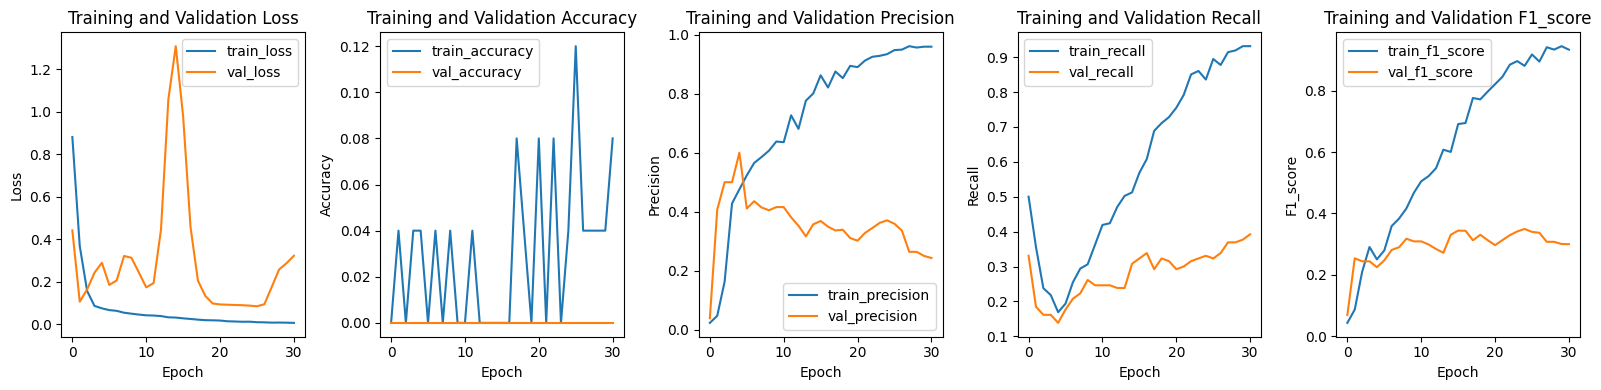

In [ ]:
# Plot training history (loss and accuracy)
import matplotlib.pyplot as plt

# Define the figure size
plt.figure(figsize=(16, 4))

# Plot training and validation loss
plt.subplot(1, 5, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 5, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation precision
plt.subplot(1, 5, 3)
plt.plot(history.history['precision_1'], label='train_precision')
plt.plot(history.history['val_precision_1'], label='val_precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

# Plot training and validation recall
plt.subplot(1, 5, 4)
plt.plot(history.history['recall_1'], label='train_recall')
plt.plot(history.history['val_recall_1'], label='val_recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

# Plot training and validation F1 score
plt.subplot(1, 5, 5)
plt.plot(history.history['f1_score_metric'], label='train_f1_score')
plt.plot(history.history['val_f1_score_metric'], label='val_f1_score')
plt.title('Training and Validation F1_score')
plt.xlabel('Epoch')
plt.ylabel('F1_score')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'f1_score_metric', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'val_f1_score_metric'])


In [ ]:
import numpy as np
image_test='/content/drive/MyDrive/meat.jpg/'
# Load and preprocess the image want to predict
new_image_path = image_test

new_image = load_and_preprocess_image(new_image_path, image_height, image_width)

#  create a batch of size 1 for prediction
input_data = np.array([new_image])

In [ ]:
# Make predictions

# Define the threshold value
threshold = 0.7  # Adjust this value based on the desired confidence level

# Create an empty list to store the true ingredients
true_ingredients = []
predictions = model.predict(input_data)
# Iterate through the list of ingredients
for i in range(len(predictions[0])):
    # Check if the probability for this ingredient is above the threshold
    # print(predictions[0][i])
    if predictions[0][i] >= threshold:
        # print(predictions[0][i])
        true_ingredients.append(labels.columns[i])

# The true_ingredients list will now contain the ingredients that meet the threshold
print("True Ingredients:", true_ingredients)

1/1 [==============================] - 2s 2s/step
True Ingredients: ['ackee', 'black beans', 'borlotti beans', 'bread', 'brown sugar', 'butter', 'camembert', 'caramel', 'caul fat', 'chicken', 'chicken leg', 'coconut oil', 'collar', 'cos lettuce', 'courgette', 'cranberry', 'cream cheese', 'dark chocolate', 'dry sherry', 'duck fat', 'flageolet beans', 'garlic bread', 'ghee', 'lamb breast', 'leftover turkey', 'lime', 'lobster', 'molasses', 'nut', 'onion', 'orange liqueur', 'ouzo', 'oyster', 'parsnip', 'penne', 'pepper', 'pork sausages', 'portobello mushrooms', 'rabbit', 'salmon', 'salt', 'salt cod', 'serrano ham', 'sorrel', 'spaghetti', 'stuffing', 'tea', 'vanilla extract', 'veal']


In [ ]:
true_ingredients

['ackee',
 'black beans',
 'borlotti beans',
 'bread',
 'brown sugar',
 'butter',
 'camembert',
 'caramel',
 'caul fat',
 'chicken',
 'chicken leg',
 'coconut oil',
 'collar',
 'cos lettuce',
 'courgette',
 'cranberry',
 'cream cheese',
 'dark chocolate',
 'dry sherry',
 'duck fat',
 'flageolet beans',
 'garlic bread',
 'ghee',
 'lamb breast',
 'leftover turkey',
 'lime',
 'lobster',
 'molasses',
 'nut',
 'onion',
 'orange liqueur',
 'ouzo',
 'oyster',
 'parsnip',
 'penne',
 'pepper',
 'pork sausages',
 'portobello mushrooms',
 'rabbit',
 'salmon',
 'salt',
 'salt cod',
 'serrano ham',
 'sorrel',
 'spaghetti',
 'stuffing',
 'tea',
 'vanilla extract',
 'veal']

In [ ]:
df.Instructions

0        Pat chicken dry with paper towels, season all ...
1        Preheat oven to 400°F and line a rimmed baking...
2        Place a rack in middle of oven; preheat to 400...
3        Preheat oven to 350°F with rack in middle. Gen...
4        Stir together brown sugar and hot water in a c...
                               ...                        
13496    Preheat the oven to 350°F. Into a bowl sift to...
13497    Preheat oven to 475°F.\nHalve lemons and scoop...
13498    If using katsuo bushi flakes from package, moi...
13499    Melt 1 tablespoon butter in a 12-inch heavy sk...
13500    Lay 4 chiles on their sides on racks of gas bu...
Name: Instructions, Length: 13501, dtype: object

In [ ]:
predictions

array([[0.88075644, 0.0857318 , 0.04019224, 0.6665307 , 0.35562104,
        0.46755677, 0.22896197, 0.5406389 , 0.6280709 , 0.12960367,
        0.16093726, 0.32001108, 0.06254817, 0.16293149, 0.36182028,
        0.04381497, 0.03293496, 0.22854951, 0.64504105, 0.07759013,
        0.17591915, 0.35077667, 0.295914  , 0.10549264, 0.06193371,
        0.16060275, 0.14527297, 0.32084942, 0.30868295, 0.21094462,
        0.24548858, 0.34908143, 0.2880199 , 0.10631597, 0.419127  ,
        0.2884982 , 0.2931925 , 0.22833519, 0.41064927, 0.2820069 ,
        0.607322  , 0.13430972, 0.24352765, 0.3330075 , 0.19550157,
        0.44685867, 0.5097573 , 0.0487858 , 0.392538  , 0.15663172,
        0.19383161, 0.7028243 , 0.03106145, 0.14502044, 0.16541655,
        0.0722706 , 0.20042513, 0.28436506, 0.30441043, 0.16138205,
        0.13652794, 0.30797732, 0.7163092 , 0.2190275 , 0.69059414,
        0.22702177, 0.0882249 , 0.43168867, 0.7107122 , 0.56392235,
        0.02716107, 0.23009093, 0.47386488, 0.54

In [ ]:
# stage 2



# Stage 2

### Transformer Model

In [ ]:
# stage 2

In [ ]:
from tensorflow.keras.layers import Input, Embedding, Masking, MultiHeadAttention, Dense, Add, LayerNormalization, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


df['Instructions'] = df['Instructions'].astype(str)  # Convert non-string values to string

# Tokenize inputs and outputs
tokenizer_inputs = tf.keras.preprocessing.text.Tokenizer(filters='')
tokenizer_outputs = tf.keras.preprocessing.text.Tokenizer(filters='')

newf = pd.DataFrame({'Ingredients': new_ingredient_lists})


X = newf['Ingredients'].values
y = df['Instructions'].values

tokenizer_inputs.fit_on_texts(X)
tokenizer_outputs.fit_on_texts(y)

X = tokenizer_inputs.texts_to_sequences(X)
y = tokenizer_outputs.texts_to_sequences(y)

X = pad_sequences(X)
y = pad_sequences(y)

# Define the Transformer model
embedding_dim = 256
num_heads = 8
dff = 512
num_blocks = 6
vocab_size = len(tokenizer_outputs.word_index) + 1

# Encoder
input_layer = Input(shape=(X.shape[1],))
x = Embedding(vocab_size, embedding_dim)(input_layer)
x = Masking(mask_value=0)(x)  # Masking padding tokens

# Inside the loop where use MultiHeadAttention
for _ in range(num_blocks):
    # Apply MultiHeadAttention (self-attention in the encoder)
    attention_output = MultiHeadAttention(
        num_heads=num_heads,
        key_dim=embedding_dim // num_heads,
        dropout=0.1
    )(x, x, x)

    # Merge the attention output with the original input
    x = Add()([x, attention_output])

    # Continue with the rest of your code
    x = LayerNormalization(epsilon=1e-6)(x)
    y = Conv1D(filters=dff, kernel_size=1, activation='relu')(x)
    y = Conv1D(filters=embedding_dim, kernel_size=1)(y)
    x = Add()([x, y])
    x = LayerNormalization(epsilon=1e-6)(x)

# Decoder
decoder_input = Input(shape=(y.shape[1],))
y = Embedding(vocab_size, embedding_dim)(decoder_input)
y = Masking(mask_value=0)(y)  # Masking padding tokens

# Inside the loop where use MultiHeadAttention
for _ in range(num_blocks):
    # Apply MultiHeadAttention (self-attention in the decoder)
    attention_output = MultiHeadAttention(
        num_heads=num_heads,
        key_dim=embedding_dim // num_heads,
        dropout=0.1
    )(y, y, y)

    # Merge the attention output with the original input
    y = Add()([y, attention_output])

    # Continue with the rest of your code
    y = LayerNormalization(epsilon=1e-6)(y)
    z = MultiHeadAttention(
        num_heads=num_heads,
        key_dim=embedding_dim // num_heads,
        dropout=0.1
    )(y, x, x)  # Cross-attention to the encoder's output
    y = Add()([y, z])
    y = LayerNormalization(epsilon=1e-6)(y)
    z = Conv1D(filters=dff, kernel_size=1, activation='relu')(y)
    z = Conv1D(filters=embedding_dim, kernel_size=1)(z)
    y = Add()([y, z])
    y = LayerNormalization(epsilon=1e-6)(y)

# Output layer
output_layer = Dense(vocab_size, activation='softmax')(y)

# Define the model
model = Model(inputs=[input_layer, decoder_input], outputs=output_layer)


from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Compile model after setting the policy
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



# model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])






In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 49)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 49, 256)              1315328   ['input_11[0][0]']            
                                                          0                                       
                                                                                                  
 masking (Masking)           (None, 49, 256)              0         ['embedding[0][0]']           
                                                                                                  
 multi_head_attention (Mult  (None, 49, 256)              263168    ['masking[0][0]',         

In [ ]:
# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)


# # Convert to NumPy arrays
# X_array = np.array(X)

# # Specify the name of the layer want to evaluate
# layer_name = 'layer_normalization_119'
# # Use K.function to evaluate the symbolic tensor
# layer_output = model.get_layer(name=layer_name).output
# y_eval = K.function(inputs=model.input, outputs=layer_output)


# X_dummy = np.zeros_like(X_array)
# y_array = y_eval([X_array, X_dummy])

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_array, y_array, test_size=0.2, random_state=42)
# # Make sure X_dummy has the same shape as X_array
# X_dummy = np.zeros_like(X_train)  # Assuming X_train is the training portion of X_array

# # Train the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# model.fit([X_train, X_dummy], y_train, epochs=20, validation_data=([X_val, X_dummy], y_val), callbacks=[early_stopping], batch_size=32)



In [ ]:
X_train.shape


(10800, 49)

In [ ]:
X_dummy.shape

(13501, 49)

In [ ]:
y_train.shape

(10800, 49, 256)

In [ ]:
seed_ingredients = "1 cup flour, 2 eggs, 1 cup sugar"
generated_instructions = generate_text(seed_ingredients)
print(generated_instructions)

In [ ]:
# from tensorflow.keras.layers import Input, Embedding, Masking, MultiHeadAttention, Dense, Add, LayerNormalization, Conv1D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np


# df['Instructions'] = df['Instructions'].astype(str)  # Convert non-string values to string

# # Tokenize inputs and outputs
# tokenizer_inputs = tf.keras.preprocessing.text.Tokenizer(filters='')
# tokenizer_outputs = tf.keras.preprocessing.text.Tokenizer(filters='')

# newf = pd.DataFrame({'Ingredients': new_ingredient_lists})


# X = newf['Ingredients'].values
# y = df['Instructions'].values

# tokenizer_inputs.fit_on_texts(X)
# tokenizer_outputs.fit_on_texts(y)

# X = tokenizer_inputs.texts_to_sequences(X)
# y = tokenizer_outputs.texts_to_sequences(y)

# X = pad_sequences(X)
# y = pad_sequences(y)

# # Define the Transformer model
# embedding_dim = 256
# num_heads = 8
# dff = 512
# num_blocks = 6
# vocab_size = len(tokenizer_outputs.word_index) + 1

# # Encoder
# input_layer = Input(shape=(X.shape[1],))
# x = Embedding(vocab_size, embedding_dim)(input_layer)
# x = Masking(mask_value=0)(x)  # Masking padding tokens

# # Inside the loop where use MultiHeadAttention
# for _ in range(num_blocks):
#     # Apply MultiHeadAttention (self-attention in the encoder)
#     attention_output = MultiHeadAttention(
#         num_heads=num_heads,
#         key_dim=embedding_dim // num_heads,
#         dropout=0.1
#     )(x, x, x)

#     # Merge the attention output with the original input
#     x = Add()([x, attention_output])

#     # Continue with the rest of your code
#     x = LayerNormalization(epsilon=1e-6)(x)
#     y = Conv1D(filters=dff, kernel_size=1, activation='relu')(x)
#     y = Conv1D(filters=embedding_dim, kernel_size=1)(y)
#     x = Add()([x, y])
#     x = LayerNormalization(epsilon=1e-6)(x)

# # Decoder
# decoder_input = Input(shape=(y.shape[1],))
# y = Embedding(vocab_size, embedding_dim)(decoder_input)
# y = Masking(mask_value=0)(y)  # Masking padding tokens

# # Inside the loop where use MultiHeadAttention
# for _ in range(num_blocks):
#     # Apply MultiHeadAttention (self-attention in the decoder)
#     attention_output = MultiHeadAttention(
#         num_heads=num_heads,
#         key_dim=embedding_dim // num_heads,
#         dropout=0.1
#     )(y, y, y)

#     # Merge the attention output with the original input
#     y = Add()([y, attention_output])

#     # Continue with the rest of your code
#     y = LayerNormalization(epsilon=1e-6)(y)
#     z = MultiHeadAttention(
#         num_heads=num_heads,
#         key_dim=embedding_dim // num_heads,
#         dropout=0.1
#     )(y, x, x)  # Cross-attention to the encoder's output
#     y = Add()([y, z])
#     y = LayerNormalization(epsilon=1e-6)(y)
#     z = Conv1D(filters=dff, kernel_size=1, activation='relu')(y)
#     z = Conv1D(filters=embedding_dim, kernel_size=1)(z)
#     y = Add()([y, z])
#     y = LayerNormalization(epsilon=1e-6)(y)

# # Output layer
# output_layer = Dense(vocab_size, activation='softmax')(y)

# # Define the model
# model = Model(inputs=[input_layer, decoder_input], outputs=output_layer)


# from tensorflow.keras import mixed_precision

# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

# # Compile model after setting the policy
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# # model.compile(optimizer=Adam(learning_rate=0.001), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
# import tensorflow as tf
# physical_devices = tf.config.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)


# # Convert to NumPy arrays
# X_array = np.array(X)

# # Specify the name of the layer want to evaluate
# layer_name = 'layer_normalization_623'
# # Use K.function to evaluate the symbolic tensor
# layer_output = model.get_layer(name=layer_name).output
# y_eval = K.function(inputs=model.input, outputs=layer_output)


# X_dummy = np.zeros_like(X_array)
# y_array = y_eval([X_array, X_dummy])

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

# # Train the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# model.fit([X_train, X_dummy], y_train, epochs=20, validation_data=([X_val, X_dummy], y_val), callbacks=[early_stopping],batch_size=32)



In [ ]:
num_samples = len(image_names)
num_samples

13501

In [ ]:
# images = []

# for img_name in image_names:
#     img_path = image_dir + img_name + '.jpg'
#     img = load_and_preprocess_image(img_path, image_height, image_width)
#     images.append(img)

# Too much slowly, not use

In [ ]:
image_dir

'/content/drive/MyDrive/food/Food Images/Food Images/'

In [ ]:
# import os
# import tensorflow as tf

# def load_image(filename_tensor, image_dir, image_size=(224, 224)):
#     # Use tf.py_function to call a Python function
#     def _load_image(filename):
#         # Extract the string value from the Tensor
#         filename = filename.numpy().decode('utf-8') if hasattr(filename, 'numpy') else filename.decode('utf-8')

#         # Construct the full path to the image
#         image_path = os.path.join(image_dir, filename + ".jpg")

#         if tf.io.gfile.exists(image_path):
#             image = tf.io.read_file(image_path)
#             image = tf.image.decode_jpeg(image, channels=3)
#             image = tf.cast(image, tf.float32)

#             # Resize if needed
#             image = tf.image.resize(image, image_size)

#             # Apply ResNet50 preprocessing
#             image = tf.keras.applications.resnet50.preprocess_input(image)

#             return image
#         else:
#             print(f"File not found: {image_path}")
#             # Return a placeholder image if the file is not found
#             return tf.zeros(shape=image_size + (3,), dtype=tf.float32)

#     # Use tf.py_function to wrap the Python function
#     return tf.py_function(_load_image, [filename_tensor], tf.float32)













In [ ]:
# image_paths = [image_dir + img_name + '.jpg' for img_name in image_names]
# dataset = tf.data.Dataset.from_tensor_slices(image_paths)

# # Define a function to load and preprocess images
# def load_and_preprocess_image(img_path):
#     # Load image
#     img = tf.io.read_file(img_path)
#     img = tf.image.decode_jpeg(img, channels=3)
#     img = tf.image.resize(img, [image_height, image_width])
#     img = tf.keras.applications.resnet50.preprocess_input(img)
#     return img

# # Apply the load_and_preprocess_image function to the dataset
# dataset = dataset.map(load_and_preprocess_image)

# images = []

# tf.experimental.numpy.experimental_enable_numpy_behavior()

# for img_path in dataset:
#     img_path_string = np.array2string(img_path)
#     if tf.io.gfile.exists(tf.compat.as_bytes(img_path_string)):
#         img = load_and_preprocess_image(img_path)
#         images.append(img)




In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Embedding, Masking, MultiHeadAttention, Dense, Add, LayerNormalization, Conv1D
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras import mixed_precision
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.layers import Concatenate

# df['Instructions'] = df['Instructions'].astype(str)  # Convert non-string values to string

# # Tokenize inputs and outputs
# tokenizer_inputs = tf.keras.preprocessing.text.Tokenizer(filters='')
# tokenizer_outputs = tf.keras.preprocessing.text.Tokenizer(filters='')

# newf = pd.DataFrame({'Ingredients': new_ingredient_lists})


# X = newf['Ingredients'].values
# y = df['Instructions'].values



# tokenizer_inputs.fit_on_texts(X)
# tokenizer_outputs.fit_on_texts(y)

# X = tokenizer_inputs.texts_to_sequences(X)
# y = tokenizer_outputs.texts_to_sequences(y)

# X = pad_sequences(X)
# y = pad_sequences(y)




# # # Load ResNet model with specific input shape
# # resnet_model = ResNet50(weights='imagenet', input_shape=(image_height, image_width, 3), pooling='avg', include_top=False)

# resnet_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3), pooling='avg', include_top=False)

# batch_size=32





In [ ]:
image_features

array([[3.7961125e-01, 4.7528669e-01, 1.1232425e+00, ..., 8.4558071e-04,
        2.7364109e+00, 2.5815159e-01],
       [0.0000000e+00, 1.3791976e+00, 1.2801945e+00, ..., 8.5026085e-02,
        5.7739496e-01, 2.0821062e-01],
       [0.0000000e+00, 9.2691347e-02, 1.5097392e+00, ..., 0.0000000e+00,
        2.5941412e+00, 0.0000000e+00],
       ...,
       [4.8794964e-01, 1.9373733e+00, 2.7524526e+00, ..., 4.4741908e-01,
        1.4492395e+00, 3.8236767e-01],
       [4.0504035e-01, 1.4468580e+00, 4.3772902e+00, ..., 8.1982829e-02,
        2.1765461e+00, 2.1482510e-03],
       [1.3568707e-01, 3.6548657e+00, 1.8785838e+00, ..., 2.4777141e-03,
        7.7667952e-01, 8.9958191e-01]], dtype=float32)

In [ ]:
# # # Extract feature vectors from images
# # image_features = resnet_model.predict(image_dataset)

# # Assuming 'image_features' is a numpy array with shape (num_samples, feature_dim)
# # Repeat the image features for each ingredient set
# image_features = np.repeat(image_features, len(X[0]), axis=1)

# # Concatenate image features with ingredient sequences
# X_concat = np.concatenate([image_features, X], axis=1)



# # Define the Transformer model
# embedding_dim = 256
# num_heads = 8
# dff = 512
# num_blocks = 6
# vocab_size = len(tokenizer_outputs.word_index) + 1

# # Encoder
# input_layer = Input(shape=(X_concat.shape[1],))
# x = Embedding(vocab_size, embedding_dim)(input_layer)
# x = Masking(mask_value=0)(x)  # Masking padding tokens

# # Inside the loop where use MultiHeadAttention
# for _ in range(num_blocks):
#     attention_output = MultiHeadAttention(
#         num_heads=num_heads,
#         key_dim=embedding_dim // num_heads,
#         dropout=0.1
#     )(x, x, x)
#     x = Add()([x, attention_output])
#     x = LayerNormalization(epsilon=1e-6)(x)
#     y = Conv1D(filters=dff, kernel_size=1, activation='relu')(x)
#     y = Conv1D(filters=embedding_dim, kernel_size=1)(y)
#     x = Add()([x, y])
#     x = LayerNormalization(epsilon=1e-6)(x)

# # Decoder
# decoder_input = Input(shape=(y.shape[1],))
# y = Embedding(vocab_size, embedding_dim)(decoder_input)
# y = Masking(mask_value=0)(y)

# for _ in range(num_blocks):
#     attention_output = MultiHeadAttention(
#         num_heads=num_heads,
#         key_dim=embedding_dim // num_heads,
#         dropout=0.1
#     )(y, y, y)
#     y = Add()([y, attention_output])
#     y = LayerNormalization(epsilon=1e-6)(y)
#     z = MultiHeadAttention(
#         num_heads=num_heads,
#         key_dim=embedding_dim // num_heads,
#         dropout=0.1
#     )(y, x, x)
#     y = Add()([y, z])
#     y = LayerNormalization(epsilon=1e-6)(y)
#     z = Conv1D(filters=dff, kernel_size=1, activation='relu')(y)
#     z = Conv1D(filters=embedding_dim, kernel_size=1)(z)
#     y = Add()([y, z])
#     y = LayerNormalization(epsilon=1e-6)(y)

# # Output layer
# output_layer = Dense(vocab_size, activation='softmax')(y)

# # Define the model
# model = Model(inputs=[input_layer, decoder_input], outputs=output_layer)

# # Set mixed precision policy
# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Convert to NumPy arrays
# X_concat_array = np.array(X_concat)


# layer_name = 'layer_normalization'  # Update with the wanted layer name

# # Use K.function to evaluate the symbolic tensor
# layer_output = model.get_layer(name=layer_name).output
# y_eval = tf.keras.backend.function(inputs=model.input, outputs=layer_output)
# y_array = y_eval([X_concat_array, np.zeros_like(X_concat_array)])

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X_concat_array, y_array, test_size=0.2, random_state=42)

# # Train the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# model.fit([X_train, np.zeros_like(X_train)], y_train, epochs=20, validation_data=([X_val, np.zeros_like(X_val)], y_val), callbacks=[early_stopping], batch_size=32)

In [ ]:
df["Image_Name"]

0        miso-butter-roast-chicken-acorn-squash-panzanella
1               crispy-salt-and-pepper-potatoes-dan-kluger
2               thanksgiving-mac-and-cheese-erick-williams
3                italian-sausage-and-bread-stuffing-240559
4                       newtons-law-apple-bourbon-cocktail
                               ...                        
13496                           brownie-pudding-cake-14408
13497    israeli-couscous-with-roasted-butternut-squash...
13498    rice-with-soy-glazed-bonito-flakes-and-sesame-...
13499                                   spanakopita-107344
13500    mexican-poblano-spinach-and-black-bean-lasagne...
Name: Image_Name, Length: 13501, dtype: object

In [ ]:
image_dir


'/content/drive/MyDrive/food/Food Images/Food Images/'

In [ ]:
def load_and_preprocess_images(filenames, image_dir, image_size=(224, 224)):
    images = []

    for filename in filenames:
        # Convert the filename to a string
        filename_str = ''.join(map(str, filename))

        # Construct the full path to the image
        image_path = os.path.join(image_dir, filename_str + ".jpg")

        if tf.io.gfile.exists(image_path):
            image = tf.io.read_file(image_path)
            image = tf.image.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, image_size)
            image = tf.keras.applications.resnet50.preprocess_input(image)
            images.append(image)
        else:
            print(f"File not found: {image_path}")

    return tf.convert_to_tensor(images, dtype=tf.float32)

# Usage example:
batch_size = 32
image_filenames = df['Image_Name'].values

# Load and preprocess the images
image_batch = load_and_preprocess_images(image_filenames[:batch_size], image_dir)


image_features = resnet_model.predict(image_batch)




1/1 [==============================] - 5s 5s/step


In [ ]:
X

array([[ 0,  0,  0, ..., 51, 78, 22],
       [ 0,  0,  0, ..., 49, 93, 31],
       [ 0,  0,  0, ..., 65, 30, 16],
       ...,
       [ 0,  0,  0, ..., 29, 40,  6],
       [ 0,  0,  0, ..., 21,  8, 79],
       [ 0,  0,  0, ..., 21,  5,  6]], dtype=int32)

In [ ]:
image_features

array([[3.7961125e-01, 4.7528669e-01, 1.1232425e+00, ..., 8.4558071e-04,
        2.7364109e+00, 2.5815159e-01],
       [0.0000000e+00, 1.3791976e+00, 1.2801945e+00, ..., 8.5026085e-02,
        5.7739496e-01, 2.0821062e-01],
       [0.0000000e+00, 9.2691347e-02, 1.5097392e+00, ..., 0.0000000e+00,
        2.5941412e+00, 0.0000000e+00],
       ...,
       [4.8794964e-01, 1.9373733e+00, 2.7524526e+00, ..., 4.4741908e-01,
        1.4492395e+00, 3.8236767e-01],
       [4.0504035e-01, 1.4468580e+00, 4.3772902e+00, ..., 8.1982829e-02,
        2.1765461e+00, 2.1482510e-03],
       [1.3568707e-01, 3.6548657e+00, 1.8785838e+00, ..., 2.4777141e-03,
        7.7667952e-01, 8.9958191e-01]], dtype=float32)

In [ ]:
# Transforer model, not sucessful

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Input, Embedding, Masking, MultiHeadAttention, Add, LayerNormalization, Conv1D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np
import pandas as pd

# Assuming df, new_ingredient_lists, and image_dataset are defined

# Convert non-string values to string
df['Instructions'] = df['Instructions'].astype(str)

# Tokenize inputs and outputs
tokenizer_inputs = Tokenizer(filters='')
tokenizer_outputs = Tokenizer(filters='')

newf = pd.DataFrame({'Ingredients': new_ingredient_lists})

X = newf['Ingredients'].values
y = df['Instructions'].values

tokenizer_inputs.fit_on_texts(X)
tokenizer_outputs.fit_on_texts(y)

X = tokenizer_inputs.texts_to_sequences(X)
y = tokenizer_outputs.texts_to_sequences(y)

X = pad_sequences(X)
y = pad_sequences(y, padding='post')  # Padding at the end of the sequences

# Load ResNet model with specific input shape
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', input_shape=(224, 224, 3), pooling='avg', include_top=False)



# Define the Transformer model
embedding_dim = 256
num_heads = 8
dff = 512
num_blocks = 6
vocab_size = len(tokenizer_outputs.word_index) + 1

# Encoder
input_layer = Input(shape=(X.shape[1],))
x = Embedding(vocab_size, embedding_dim)(input_layer)
x = Masking(mask_value=0)(x)  # Masking padding tokens

for _ in range(num_blocks):
    attention_output = MultiHeadAttention(
        num_heads=num_heads,
        key_dim=embedding_dim // num_heads,
        dropout=0.1
    )(x, x, x)
    x = Add()([x, attention_output])
    x = LayerNormalization(epsilon=1e-6)(x)
    y = Conv1D(filters=dff, kernel_size=1, activation='relu')(x)
    y = Conv1D(filters=embedding_dim, kernel_size=1)(y)
    x = Add()([x, y])
    x = LayerNormalization(epsilon=1e-6)(x)

# Decoder
decoder_input = Input(shape=(y.shape[1],))
y = Embedding(vocab_size, embedding_dim)(decoder_input)
y = Masking(mask_value=0)(y)

for _ in range(num_blocks):
    attention_output = MultiHeadAttention(
        num_heads=num_heads,
        key_dim=embedding_dim // num_heads,
        dropout=0.1
    )(y, y, y)
    y = Add()([y, attention_output])
    y = LayerNormalization(epsilon=1e-6)(y)
    z = MultiHeadAttention(
        num_heads=num_heads,
        key_dim=embedding_dim // num_heads,
        dropout=0.1
    )(y, x, x)
    y = Add()([y, z])
    y = LayerNormalization(epsilon=1e-6)(y)
    z = Conv1D(filters=dff, kernel_size=1, activation='relu')(y)
    z = Conv1D(filters=embedding_dim, kernel_size=1)(z)
    y = Add()([y, z])
    y = LayerNormalization(epsilon=1e-6)(y)


# Output layer
output_layer = LSTM(units=embedding_dim, return_sequences=True)(y)
output_layer = Dense(vocab_size, activation='softmax')(output_layer)


# Define the model
model = Model(inputs=[input_layer, decoder_input], outputs=output_layer)

# Set mixed precision policy
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Convert to NumPy arrays
X_array = np.array(X)





In [ ]:
output_layer

<KerasTensor: shape=(None, 49, 51380) dtype=float16 (created by layer 'dense_6')>

In [ ]:
# Batch processing
batch_size = 32
num_batches = len(X_array) // batch_size

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size

    # Load and preprocess the images
    image_batch = load_and_preprocess_images(df['Image_Name'].values[start_idx:end_idx], image_dir)

    # Extract image features
    image_features = resnet_model.predict(image_batch)

    # Process the current batch of text data
    X_batch = X_array[start_idx:end_idx]
    print('image_features shape:',image_features.shape)
    print('X_batch shape:',X_batch.shape)


# Assuming X_batch is input sequence
    max_sequence_length = 49
    X_batch_padded = pad_sequences(X_batch, maxlen=max_sequence_length, padding='post', truncating='post')


    X_batch_copy = np.copy(X_batch_padded)
    # Reshape X_batch to match the expected input shape
    X_batch_reshaped = X_batch_padded.reshape((-1, 49))

# Predict sequences for the current batch
    y_batch_pred = model.predict([image_features, X_batch_reshaped])



# Repeat the image features for each ingredient set
    image_features_repeated = np.repeat(image_features, len(X_batch[0]), axis=1)

# Concatenate image features with ingredient sequences
    X_concat_batch = np.concatenate([image_features_repeated, X_batch], axis=1)

# Train the model on the current batch
    model.fit([X_concat_batch, np.zeros_like(X_concat_batch)], y_batch_pred, epochs=1, batch_size=batch_size, shuffle=True)

# Evaluate the model on the validation set
X_val, y_val = X_array[-batch_size:], y[-batch_size:]
image_val = load_and_preprocess_images(df['Image_Name'].values[-batch_size:], image_dir)
image_features_val = resnet_model.predict(image_val)
image_features_val_repeated = np.repeat(image_features_val, len(X_val[0]), axis=1)
X_concat_val = np.concatenate([image_features_val_repeated, X_val], axis=1)

# Ensure that y_val is not empty
if not np.any(y_val):
    raise ValueError("Validation set labels are empty.")

model.evaluate([X_concat_val, np.zeros_like(X_concat_val)], y_val)


1/1 [==============================] - 11s 11s/step
image_features shape: (32, 2048)
X_batch shape: (32, 49)


ValueError: ignored

In [ ]:
# LSTM model

In [ ]:
newf = pd.DataFrame({'Ingredients': new_ingredient_lists})

In [ ]:
newf.shape

(13501, 1)

In [ ]:
newf

,Ingredients
0,"[white wine, sage, wine, allspice, pie, white ..."
1,"[rosemary, black pepper, thyme, salt, egg, tea..."
2,"[evaporated milk, cheddar, black pepper, salt,..."
3,"[sage, cloves, baking, oil, pie, cream, olive,..."
4,"[cinnamon, lemon juice, brown sugar, orange, t..."
...,...
13496,"[baking, brown sugar, oil, cream, milk, coffee..."
13497,"[oil, pine nut, pepper, lemon, olive, eel, cin..."
13498,"[grain, bonito, tea, soy sauce, sesame seeds, ..."
13499,"[nutmeg, salt, tea, rum, feta, spinach, nut, b..."


In [ ]:
len(df['Ingredients'])

13501

In [ ]:
df['Instructions']

0        Pat chicken dry with paper towels, season all ...
1        Preheat oven to 400°F and line a rimmed baking...
2        Place a rack in middle of oven; preheat to 400...
3        Preheat oven to 350°F with rack in middle. Gen...
4        Stir together brown sugar and hot water in a c...
                               ...                        
13496    Preheat the oven to 350°F. Into a bowl sift to...
13497    Preheat oven to 475°F.\nHalve lemons and scoop...
13498    If using katsuo bushi flakes from package, moi...
13499    Melt 1 tablespoon butter in a 12-inch heavy sk...
13500    Lay 4 chiles on their sides on racks of gas bu...
Name: Instructions, Length: 13501, dtype: object

## LSTM Model

LSTM model is very difficult to train, often crash out of memory, using all the RAM

In [ ]:
pip install --upgrade tensorflow


In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, TimeDistributed, Dense
from keras.utils import to_categorical
import numpy as np

newf = pd.DataFrame({'Ingredients': new_ingredient_lists})

# Define a data generator
def data_generator(X, y, batch_size):
    num_samples = len(X)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            yield X_batch, to_categorical(y_batch, num_classes=vocab_size_instr)

# Preprocess the text data for ingredients
tokenizer = Tokenizer()
tokenizer.fit_on_texts(newf['Ingredients'])
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(newf['Ingredients'])
max_sequence_length = max(len(seq) for seq in sequences)

X_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Preprocess the text data for instructions
# Handle missing values in the "Instructions" column
df['Instructions'].fillna('', inplace=True)

tokenizer_instr = Tokenizer()
tokenizer_instr.fit_on_texts(df['Instructions'])
vocab_size_instr = len(tokenizer_instr.word_index) + 1

sequences_instr = tokenizer_instr.texts_to_sequences(df['Instructions'])
y_padded = pad_sequences(sequences_instr, maxlen=max_sequence_length, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_padded, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 16  # Reduced embedding dimension
lstm_units = 16  # Reduced LSTM units

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units, return_sequences=True))
model.add(TimeDistributed(Dense(units=vocab_size_instr, activation='softmax')))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the data generator
batch_size = 16  # Adjust batch size
epochs = 100  # Adjust the number of epochs

train_data_generator = data_generator(X_train, y_train, batch_size)
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# model.fit(train_data_generator, steps_per_epoch=len(X_train)//batch_size, epochs=epochs, validation_data=(X_test, to_categorical(y_test, num_classes=vocab_size_instr)), callbacks=[early_stopping])

model.fit(train_data_generator, steps_per_epoch=len(X_train)//batch_size, epochs=epochs, validation_data=(X_test, to_categorical(y_test, num_classes=vocab_size_instr)))





Epoch 1/100
675/675 [==============================] - 221s 324ms/step - loss: 6.5188 - accuracy: 0.0510 - val_loss: 5.9976 - val_accuracy: 0.0722
Epoch 2/100
675/675 [==============================] - 204s 302ms/step - loss: 5.9862 - accuracy: 0.0710 - val_loss: 5.9893 - val_accuracy: 0.0722
Epoch 3/100
675/675 [==============================] - 217s 321ms/step - loss: 5.9801 - accuracy: 0.0710 - val_loss: 5.9895 - val_accuracy: 0.0722
Epoch 4/100
675/675 [==============================] - 215s 319ms/step - loss: 5.9781 - accuracy: 0.0710 - val_loss: 5.9900 - val_accuracy: 0.0722
Epoch 5/100
675/675 [==============================] - 215s 318ms/step - loss: 5.9772 - accuracy: 0.0710 - val_loss: 5.9905 - val_accuracy: 0.0722
Epoch 6/100
675/675 [==============================] - 209s 309ms/step - loss: 5.9766 - accuracy: 0.0710 - val_loss: 5.9899 - val_accuracy: 0.0722
Epoch 7/100
675/675 [==============================] - 209s 310ms/step - loss: 5.9753 - accuracy: 0.0710 - val_loss: 5

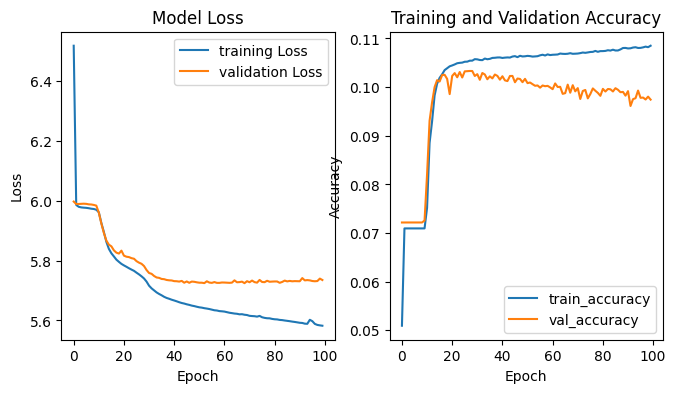

In [ ]:
import matplotlib.pyplot as plt

history = model.history

# Plot the loss and perplexity with epoch increase
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Example of test ingredients for prediction
new_ingredients = newf.Ingredients[0]

# Tokenize and pad the new ingredients
new_sequences = tokenizer.texts_to_sequences(new_ingredients)
new_padded = pad_sequences(new_sequences, maxlen=max_sequence_length, padding='post')

# Make predictions using the trained model
predictions = model.predict(new_padded)

# Convert predictions to sequences of indices (use argmax for each time step)
predicted_sequences = [np.argmax(prediction, axis=-1) for prediction in predictions]


predicted_instructions = []

for seq in predicted_sequences:
    if isinstance(seq, int):
        # If seq is a single integer, create a list containing the integer
        predicted_instructions.append([seq])
    else:
        # If seq is a sequence, convert it to text using sequences_to_texts
        predicted_instructions.append(tokenizer_instr.sequences_to_texts([seq])[0])

# Print the predicted instructions
for i, instruction in enumerate(predicted_instructions):
    print(f"Prediction {i+1}: {' '.join(instruction)}")



2/2 [==============================] - 0s 15ms/step
Prediction 1: a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d
Prediction 2: a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a 

In [ ]:
predictions

array([[[1.58050261e-03, 2.26292736e-03, 1.46068027e-03, ...,
         7.00708370e-06, 6.16446705e-05, 6.94235678e-06],
        [1.70491580e-02, 9.73282009e-03, 5.30509185e-03, ...,
         6.20726269e-07, 2.32716193e-05, 6.12796384e-07],
        [7.79106244e-02, 2.28622202e-02, 1.11546218e-02, ...,
         5.07297528e-08, 7.24413849e-06, 4.99626545e-08],
        ...,
        [7.40522563e-01, 1.51606435e-02, 8.04706290e-03, ...,
         3.45220935e-11, 2.29666792e-08, 3.54405949e-11],
        [7.42590189e-01, 1.49308192e-02, 7.89054297e-03, ...,
         3.54305821e-11, 2.29064749e-08, 3.63898425e-11],
        [7.44605005e-01, 1.47021590e-02, 7.73702003e-03, ...,
         3.63861337e-11, 2.28648158e-08, 3.73883077e-11]],

       [[1.58050261e-03, 2.26292736e-03, 1.46068027e-03, ...,
         7.00708370e-06, 6.16446705e-05, 6.94235678e-06],
        [1.70491580e-02, 9.73282009e-03, 5.30509185e-03, ...,
         6.20726269e-07, 2.32716193e-05, 6.12796384e-07],
        [7.79106244e-02, 

In [ ]:
# Perplexity:
# Perplexity is often used in language modeling tasks.
# It measures how well the model predicts the data and is the exponentiation of the entropy.
# Lower perplexity values indicate better performance.
df.iloc[0]

Unnamed: 0                                                             0
Title                  Miso-Butter Roast Chicken With Acorn Squash Pa...
Ingredients            ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...
Instructions           Pat chicken dry with paper towels, season all ...
Image_Name             miso-butter-roast-chicken-acorn-squash-panzanella
Cleaned_Ingredients    ['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...
Name: 0, dtype: object

### Tune LSTM model or add more layers

Using perplexity metric, tune the model and add more layers to improve the model's performance, don't get great improvement

In [ ]:
# Define a custom perplexity metric, this one is too small, not useful
# def perplexity(y_true, y_pred):
#     cross_entropy = K.categorical_crossentropy(y_true, y_pred)

#     # Calculate the average perplexity over the sequence
#     sequence_length = K.sum(K.cast(K.not_equal(y_true, K.zeros_like(y_true)), 'float32'))
#     perplexity = K.pow(2.0, cross_entropy / sequence_length)

#     return perplexity


# Define a custom perplexity metric
def perplexity(y_true, y_pred):
    cross_entropy = K.categorical_crossentropy(y_true, y_pred)
    perplexity = 2 ** cross_entropy
    return perplexity

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, TimeDistributed, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
import numpy as np


# Create a DataFrame for ingredients
newf = pd.DataFrame({'Ingredients': new_ingredient_lists})

# Define a data generator
def data_generator(X, y, batch_size):
    num_samples = len(X)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            yield X_batch, to_categorical(y_batch, num_classes=vocab_size_instr)

# Preprocess the text data for ingredients
tokenizer = Tokenizer()
tokenizer.fit_on_texts(newf['Ingredients'])
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(newf['Ingredients'])
max_sequence_length = max(len(seq) for seq in sequences)

X_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Preprocess the text data for instructions
# Handle missing values in the "Instructions" column
df['Instructions'].fillna('', inplace=True)

tokenizer_instr = Tokenizer()
tokenizer_instr.fit_on_texts(df['Instructions'])
vocab_size_instr = len(tokenizer_instr.word_index) + 1

sequences_instr = tokenizer_instr.texts_to_sequences(df['Instructions'])
y_padded = pad_sequences(sequences_instr, maxlen=max_sequence_length, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_padded, test_size=0.2, random_state=42)

# Build the LSTM model
embedding_dim = 64 # Adjust batch size between (8,16,32,129), 64 is best
lstm_units = 32 # Adjust batch size between (8,16,32,64), 32 is best

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units, return_sequences=True))
# model.add(Attention())
model.add(TimeDistributed(Dense(units=vocab_size_instr, activation='softmax')))



# Compile the model with the custom perplexity metric
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', perplexity]) ## adjust learning rate between (0.1,0.001,0.0005,0001) best is 0.001

# Train the model using the data generator
batch_size = 16  # Adjust batch size between (8,16,32,64), 16 is best
epochs = 15  # Adjust the number of epochs. Increase it will not increase performance

train_data_generator = data_generator(X_train, y_train, batch_size)

model.fit(train_data_generator,
          steps_per_epoch=len(X_train)//batch_size,
          epochs=epochs,
          validation_data=(X_test, to_categorical(y_test, num_classes=vocab_size_instr)))


Epoch 1/15
675/675 [==============================] - 334s 491ms/step - loss: 6.2942 - accuracy: 0.0590 - perplexity: 299.7172 - val_loss: 5.9936 - val_accuracy: 0.0722 - val_perplexity: 344.9298
Epoch 2/15
675/675 [==============================] - 283s 419ms/step - loss: 5.9858 - accuracy: 0.0710 - perplexity: 309.3728 - val_loss: 5.9916 - val_accuracy: 0.0722 - val_perplexity: 451.6549
Epoch 3/15
675/675 [==============================] - 288s 427ms/step - loss: 5.9834 - accuracy: 0.0710 - perplexity: 314.2940 - val_loss: 5.9950 - val_accuracy: 0.0722 - val_perplexity: 549.9825
Epoch 4/15
675/675 [==============================] - 329s 488ms/step - loss: 5.9822 - accuracy: 0.0710 - perplexity: 311.2865 - val_loss: 5.9940 - val_accuracy: 0.0722 - val_perplexity: 550.4268
Epoch 5/15
675/675 [==============================] - 257s 381ms/step - loss: 5.9806 - accuracy: 0.0710 - perplexity: 304.3206 - val_loss: 5.9926 - val_accuracy: 0.0722 - val_perplexity: 547.0482
Epoch 6/15
675/675 [

In [ ]:

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, to_categorical(y_test, num_classes=vocab_size_instr))
# print(f'Test Loss: {loss}, Test Accuracy: {accuracy}, Test Perplexity: {perplexity}')

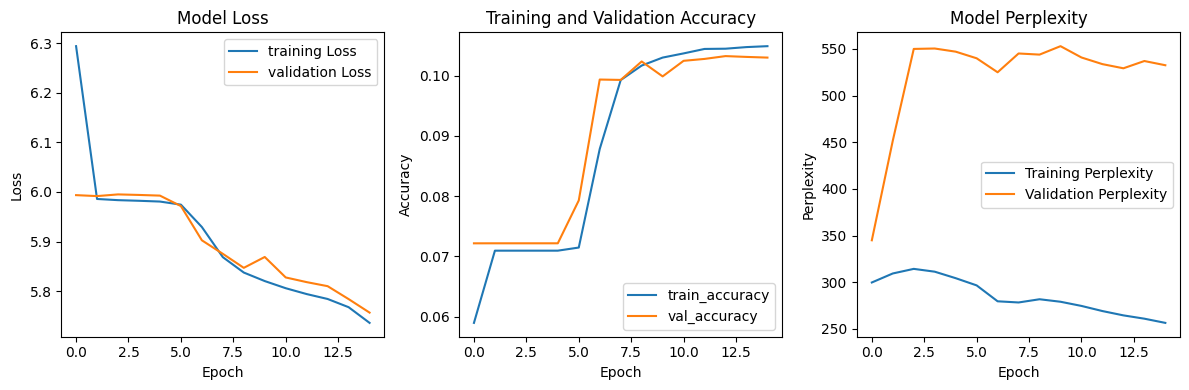

In [ ]:


# Plot the loss and accuracy with epoch increase
import matplotlib.pyplot as plt

history = model.history

# Plot the loss and perplexity with epoch increase
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot perplexity
plt.subplot(1, 3, 3)
# Perplexity callback has stored the values during training
val_perplexities = history.history['val_perplexity']
train_perplexities = history.history['perplexity']

plt.plot(train_perplexities, label='Training Perplexity')
plt.plot(val_perplexities, label='Validation Perplexity')
plt.title('Model Perplexity')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Example of test ingredients for prediction
new_ingredients = newf.Ingredients[0]

# Tokenize and pad the new ingredients
new_sequences = tokenizer.texts_to_sequences(new_ingredients)
new_padded = pad_sequences(new_sequences, maxlen=max_sequence_length, padding='post')

# Make predictions using the trained model
predictions = model.predict(new_padded)

# Convert predictions to sequences of indices (use argmax for each time step)
predicted_sequences = [np.argmax(prediction, axis=-1) for prediction in predictions]


predicted_instructions = []

for seq in predicted_sequences:
    if isinstance(seq, int):
        # If seq is a single integer, create a list containing the integer
        predicted_instructions.append([seq])
    else:
        # If seq is a sequence, convert it to text using sequences_to_texts
        predicted_instructions.append(tokenizer_instr.sequences_to_texts([seq])[0])

# Print the predicted instructions
for i, instruction in enumerate(predicted_instructions):
    print(f"Prediction {i+1}: {' '.join(instruction)}")


2/2 [==============================] - 0s 15ms/step
Prediction 1: a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d
Prediction 2: a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d
Prediction 3: a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d
Prediction 4: a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d   a n d
Prediction 5: a n d   a n d   a n d   a n d 

### LSTM model with pre-trained embeddings

In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, BatchNormalization, Dropout, TimeDistributed, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

In [ ]:
# Define a custom perplexity metric
def perplexity(y_true, y_pred):
    cross_entropy = K.categorical_crossentropy(y_true, y_pred)
    perplexity = 2 ** cross_entropy
    return perplexity


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, TimeDistributed, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Attention
from keras.callbacks import EarlyStopping

# Create a DataFrame for ingredients
newf = pd.DataFrame({'Ingredients': new_ingredient_lists})

# Define a data generator
def data_generator(X, y, batch_size):
    num_samples = len(X)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for i in range(0, num_samples, batch_size):
            batch_indices = indices[i:i + batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            yield X_batch, to_categorical(y_batch, num_classes=vocab_size_instr)

# Preprocess the text data for ingredients
tokenizer = Tokenizer()
tokenizer.fit_on_texts(newf['Ingredients'])
vocab_size = len(tokenizer.word_index) + 1

sequences = tokenizer.texts_to_sequences(newf['Ingredients'])
max_sequence_length = max(len(seq) for seq in sequences)

X_padded = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Preprocess the text data for instructions
# Handle missing values in the "Instructions" column
df['Instructions'].fillna('', inplace=True)

tokenizer_instr = Tokenizer()
tokenizer_instr.fit_on_texts(df['Instructions'])
vocab_size_instr = len(tokenizer_instr.word_index) + 1

sequences_instr = tokenizer_instr.texts_to_sequences(df['Instructions'])
y_padded = pad_sequences(sequences_instr, maxlen=max_sequence_length, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_padded, test_size=0.2, random_state=42)

# Load pre-trained word embeddings (GloVe)
embeddings_index = {}
embedding_dim = 50  # Change this based on the GloVe file downloaded, we have, and 50,100,200,300, tried 50 and 100, no difference, but increasing the number will make the training slower, so keep it 50
lstm_units=8 # Increasing LSTM units may capture more information(but for this project, increasing it will increase the perplexity). Increasing the value also causes crashes for out of memory, using CPU will be better
glove_file = f'/content/drive/MyDrive/glove.6B.{embedding_dim}d.txt'

with open(glove_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length, weights=[embedding_matrix], trainable=True))# add pretrained layer let model better
# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=lstm_units, return_sequences=True, kernel_regularizer=l2(0.01))))# Add Bidirectional LSTM can capture information from both past and future time steps, this approach bring better performance. since no obvious overfitting, so I dont adjust it
# model.add(BatchNormalization())  # Add batch normalization to normalize the output of the previous layer at each batch
model.add(LayerNormalization())  # Add Layer Normalization layer, will get better
model.add(Dropout(0.8))  # Add dropout to prevent overfitting, adjust between 0.5-0.9, best is 0.8
# model.add(LSTM(units=lstm_units, return_sequences=True))
# model.add(Attention()) # I want to add Attention, but I have not succeeded, causing shape incompatible problem, hard to resolve
model.add(TimeDistributed(Dense(units=vocab_size_instr, activation='softmax')))


# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_perplexity', patience=3, restore_best_weights=True)


# Compile the model with the custom perplexity metric
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy', perplexity]) ## adjust learning rate between (0.1,0.01,0.001) best is 0.01
batch_size = 64  # Adjust batch size between (32,64,128)
epochs = 15 # Adjust the number of epochs between (10,15,100,200), 15 is good

train_data_generator = data_generator(X_train, y_train, batch_size)

model.fit(train_data_generator,
          steps_per_epoch=len(X_train)//batch_size,
          epochs=epochs,
          validation_data=(X_test, to_categorical(y_test, num_classes=vocab_size_instr)))




Epoch 1/15
168/168 [==============================] - 339s 2s/step - loss: 6.6540 - accuracy: 0.0600 - perplexity: 1258.7386 - val_loss: 6.0532 - val_accuracy: 0.0722 - val_perplexity: 992.5965
Epoch 2/15
168/168 [==============================] - 261s 2s/step - loss: 6.2691 - accuracy: 0.0666 - perplexity: 1040.3441 - val_loss: 6.0130 - val_accuracy: 0.0752 - val_perplexity: 901.3994
Epoch 3/15
168/168 [==============================] - 265s 2s/step - loss: 6.1465 - accuracy: 0.0672 - perplexity: 843.9772 - val_loss: 5.9819 - val_accuracy: 0.0842 - val_perplexity: 929.2913
Epoch 4/15
168/168 [==============================] - 297s 2s/step - loss: 6.0685 - accuracy: 0.0689 - perplexity: 684.0461 - val_loss: 5.9582 - val_accuracy: 0.0870 - val_perplexity: 709.1964
Epoch 5/15
168/168 [==============================] - 230s 1s/step - loss: 6.0211 - accuracy: 0.0730 - perplexity: 583.8577 - val_loss: 5.9457 - val_accuracy: 0.0825 - val_perplexity: 535.4246
Epoch 6/15
168/168 [=============

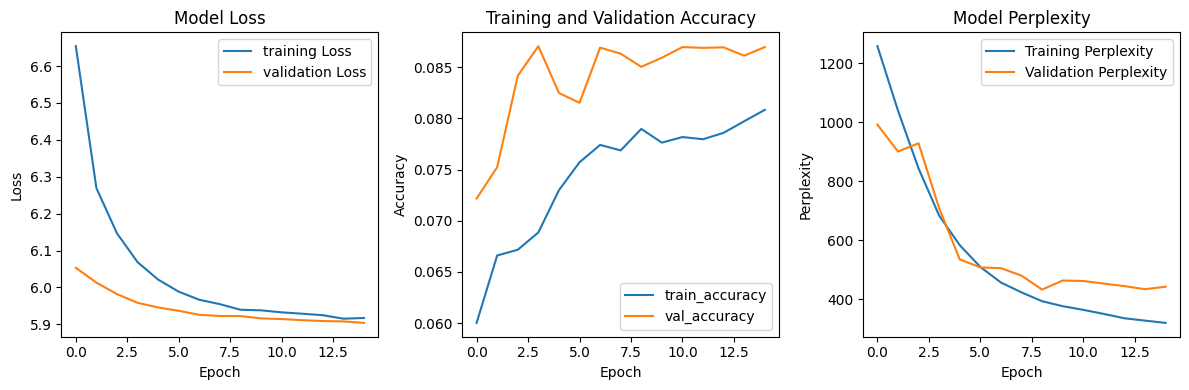

In [ ]:


# Plot the loss and accuracy with epoch increase
import matplotlib.pyplot as plt

history = model.history

# Plot the loss and perplexity with epoch increase
plt.figure(figsize=(12, 4))

# Plot training and validation loss
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot perplexity
plt.subplot(1, 3, 3)
# Perplexity callback has stored the values during training
val_perplexities = history.history['val_perplexity']
train_perplexities = history.history['perplexity']

plt.plot(train_perplexities, label='Training Perplexity')
plt.plot(val_perplexities, label='Validation Perplexity')
plt.title('Model Perplexity')
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#
# Example set of test ingredients
new_ingredients_2 = newf['Ingredients'][0]
new_sequences_2 = tokenizer.texts_to_sequences([new_ingredients_2])
new_padded_2 = pad_sequences(new_sequences_2, maxlen=max_sequence_length, padding='post')

# Make predictions using the trained model
predictions_2 = model.predict(new_padded_2)



1/1 [==============================] - 1s 1s/step


In [ ]:
predictions_2

array([[[1.8749118e-02, 4.4806514e-02, 2.7215492e-02, ...,
         5.8232723e-07, 2.3271484e-06, 5.3811488e-07],
        [2.0700647e-02, 4.6241991e-02, 2.7472733e-02, ...,
         4.7289782e-07, 1.8592410e-06, 4.3303848e-07],
        [2.2305124e-02, 4.7357518e-02, 2.7661674e-02, ...,
         4.0725544e-07, 1.5922299e-06, 3.7079442e-07],
        ...,
        [1.8053930e-01, 5.5183146e-02, 1.8821957e-02, ...,
         1.1027711e-08, 7.6112471e-08, 8.4837994e-09],
        [2.0279314e-01, 5.3940974e-02, 1.6564915e-02, ...,
         4.0194754e-09, 2.4879723e-08, 2.9943905e-09],
        [2.3762475e-01, 4.8612475e-02, 1.2475184e-02, ...,
         6.0867461e-10, 2.6418194e-09, 4.3031698e-10]]], dtype=float32)

In [ ]:
# Apply Threshold
threshold = 0.0005  # Adjust as needed
binary_predictions_2 = (predictions_2 > threshold).astype(int)
print("Binary Predictions (2nd set):", binary_predictions_2)


Binary Predictions (2nd set): [[[1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  ...
  [1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]
  [1 1 1 ... 0 0 0]]]


In [ ]:
np.unique(binary_predictions_2)

array([0, 1])

In [ ]:
# Convert Binary Predictions to Sequences
predicted_sequences_2 = [np.where(binary_prediction == 1)[1] for binary_prediction in binary_predictions_2]
print("Predicted Sequences (2nd set):", predicted_sequences_2)

# Convert Indices to Text
predicted_instructions_2 = [tokenizer_instr.sequences_to_texts([seq])[0] for seq in predicted_sequences_2]
print("Predicted Instructions (2nd set):", predicted_instructions_2)



Predicted Sequences (2nd set): [array([   0,    1,    2, ..., 1079, 1096, 1283])]
Predicted Instructions (2nd set): ['and the to a in with until 1 minutes of 2 add heat over about bowl salt into on medium then 4 large oil or 3 for is cook water mixture transfer pan pepper oven at remaining from baking stir let sugar place cup cover butter stirring cool top it skillet 5 if small remove be season using dough each ahead inch whisk high serve are set sheet sauce cut brown up preheat can side garlic 10 pot bring occasionally golden boil toss combine saucepan flour sprinkle bake just out simmer chill cream rack pour juice temperature spoon chicken tablespoons through as hours all more lemon tender half together you teaspoon mix 8 smooth grill an sides lightly 30 room heavy do will paper low 6 not cake drain beat onion hot 15 made egg cups before coat liquid slightly well tablespoon dry bottom gently reduce warm off center but down cheese spread minute aside least them stand by ice ingredient

In [ ]:
# predicted_instructions_2

In [ ]:
def remove_consecutive_duplicates(text):
    words = text.split()
    unique_words = [words[i] for i in range(len(words)) if i == 0 or words[i] != words[i - 1]]
    return ' '.join(unique_words)

# Apply the function to each predicted instruction
predicted_instructions_short = [remove_consecutive_duplicates(instruction) for instruction in predicted_instructions_2]



In [ ]:
predicted_instructions_short

['and the to a in with until 1 minutes of 2 add heat over about bowl salt into on medium then 4 large oil or 3 for is cook water mixture transfer pan pepper oven at remaining from baking stir let sugar place cup cover butter stirring cool top it skillet 5 if small remove be season using dough each ahead inch whisk high serve are set sheet sauce cut brown up preheat can side garlic 10 pot bring occasionally golden boil toss combine saucepan flour sprinkle bake just out simmer chill cream rack pour juice temperature spoon chicken tablespoons through as hours all more lemon tender half together you teaspoon mix 8 smooth grill an sides lightly 30 room heavy do will paper low 6 not cake drain beat onion hot 15 made egg cups before coat liquid slightly well tablespoon dry bottom gently reduce warm off center but down cheese spread minute aside least them stand by ice ingredients your 20 dish pieces eggs turn surface keep cooking foil parchment onto wrap thick divide very arrange vinegar cook

In [ ]:
max_length = 1447 # Set desired maximum length
predicted_instructions_short = [instruction[:max_length] for instruction in predicted_instructions_2]


In [ ]:
# def remove_redundant_words(text):
#     redundant_words = set(['and', 'the', 'to', 'in', 'with', 'until', 'of', 'add', 'over', 'about', 'bowl', 'salt', 'into', 'on', 'is', 'serve', 'then', 'for'])
#     words = text.split()
#     filtered_words = [word for word in words if word.lower() not in redundant_words]
#     return ' '.join(filtered_words)

# # Apply the function to each predicted instruction
# predicted_instructions_short = [remove_redundant_words(instruction) for instruction in predicted_instructions_2]


In [ ]:
predicted_instructions_short

['and the to a in with until 1 minutes of 2 add heat over about bowl salt into on medium then 4 large oil or 3 for is cook water mixture transfer pan pepper oven at remaining from baking stir let sugar place cup cover butter stirring cool top it skillet 5 if small remove be season using dough each ahead inch whisk high serve are set sheet sauce cut brown up preheat can side garlic 10 pot bring occasionally golden boil toss combine saucepan flour sprinkle bake just out simmer chill cream rack pour juice temperature spoon chicken tablespoons through as hours all more lemon tender half together you teaspoon mix 8 smooth grill an sides lightly 30 room heavy do will paper low 6 not cake drain beat onion hot 15 made egg cups before coat liquid slightly well tablespoon dry bottom gently reduce warm off center but down cheese spread minute aside least them stand by ice ingredients your 20 dish pieces eggs turn surface keep cooking foil parchment onto wrap thick divide very arrange vinegar cook

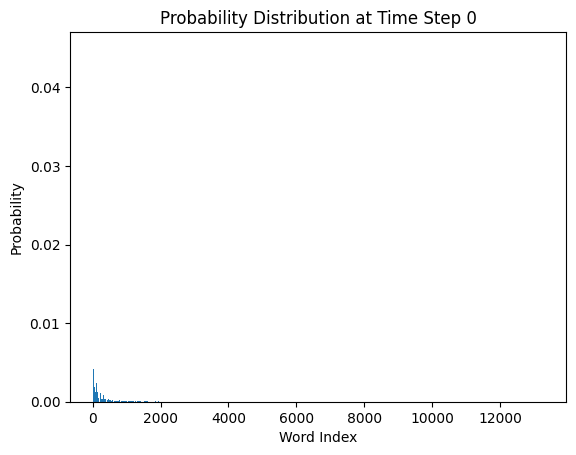

In [ ]:
import matplotlib.pyplot as plt

# Choose a time step to visualize
time_step = 0
plt.bar(range(vocab_size_instr), predictions_2[0, time_step, :])
plt.xlabel('Word Index')
plt.ylabel('Probability')
plt.title(f'Probability Distribution at Time Step {time_step}')
plt.show()



In [ ]:
# For testing
# First image's information

In [ ]:
df['Cleaned_Ingredients'][0]

'[\'1 (3½–4-lb.) whole chicken\', \'2¾ tsp. kosher salt, divided, plus more\', \'2 small acorn squash (about 3 lb. total)\', \'2 Tbsp. finely chopped sage\', \'1 Tbsp. finely chopped rosemary\', \'6 Tbsp. unsalted butter, melted, plus 3 Tbsp. room temperature\', \'¼ tsp. ground allspice\', \'Pinch of crushed red pepper flakes\', \'Freshly ground black pepper\', \'⅓ loaf good-quality sturdy white bread, torn into 1" pieces (about 2½ cups)\', \'2 medium apples (such as Gala or Pink Lady; about 14 oz. total), cored, cut into 1" pieces\', \'2 Tbsp. extra-virgin olive oil\', \'½ small red onion, thinly sliced\', \'3 Tbsp. apple cider vinegar\', \'1 Tbsp. white miso\', \'¼ cup all-purpose flour\', \'2 Tbsp. unsalted butter, room temperature\', \'¼ cup dry white wine\', \'2 cups unsalted chicken broth\', \'2 tsp. white miso\', \'Kosher salt\', \'freshly ground pepper\']'

In [ ]:
df['Instructions'][0]

'Pat chicken dry with paper towels, season all over with 2 tsp. salt, and tie legs together with kitchen twine. Let sit at room temperature 1 hour.\nMeanwhile, halve squash and scoop out seeds. Run a vegetable peeler along ridges of squash halves to remove skin. Cut each half into ½"-thick wedges; arrange on a rimmed baking sheet.\nCombine sage, rosemary, and 6 Tbsp. melted butter in a large bowl; pour half of mixture over squash on baking sheet. Sprinkle squash with allspice, red pepper flakes, and ½ tsp. salt and season with black pepper; toss to coat.\nAdd bread, apples, oil, and ¼ tsp. salt to remaining herb butter in bowl; season with black pepper and toss to combine. Set aside.\nPlace onion and vinegar in a small bowl; season with salt and toss to coat. Let sit, tossing occasionally, until ready to serve.\nPlace a rack in middle and lower third of oven; preheat to 425°F. Mix miso and 3 Tbsp. room-temperature butter in a small bowl until smooth. Pat chicken dry with paper towels, 

In [ ]:
df.Image_Name[0]

'miso-butter-roast-chicken-acorn-squash-panzanella'

In [ ]:
newf.Ingredients[0]

['chicken',
 'salt',
 'acorn squash',
 'squash',
 'sage',
 'rosemary',
 'butter',
 'salt',
 'allspice',
 'pepper',
 'black pepper',
 'pepper',
 'bread',
 'pie',
 'white bread',
 'apple',
 'pie',
 'gin',
 'oil',
 'olive',
 'olive oil',
 'onion',
 'red onion',
 'apple',
 'cider',
 'vinegar',
 'miso',
 'flour',
 'butter',
 'salt',
 'white wine',
 'wine',
 'broth',
 'chicken',
 'salt',
 'miso',
 'salt',
 'pepper']

In [ ]:
# test='/content/drive/MyDrive/miso-butter-roast-chicken-acorn-squash-panzanella.jpg/'

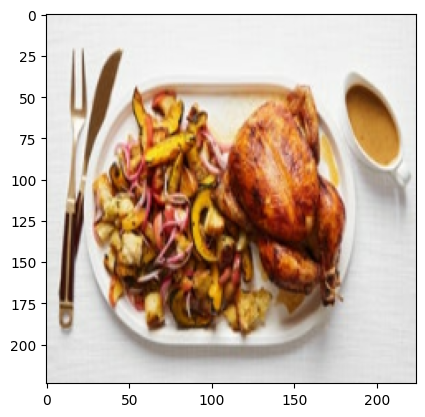

In [ ]:
# Plot the first image from the batch
image_to_plot = images[0]


plt.imshow(image_to_plot, cmap='viridis')
plt.show()